<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>House Prices - Advanced Regression Techniques in Kaggle</h2>
<h4>BCH-7813 | Business Challenge 2</h4>
Team 11<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

### Introduction To Analysis

The different models were developed to predict housing prices based on a set of input features. The model uses several algorithms such as Linear Model, Lasso Model, Ridge Model, Random Forest Model, and XGB Model to make predictions, and the performance of each algorithm is evaluated using metrics such as Root Mean Squared Error (RMSE) and Coefficient of Determination (R-squared). The analysis also includes cross-validation to check if the R-squared and RMSE values obtained from the original model are consistent across multiple splits of the dataset. The optimized versions of the Lasso Model, Ridge Model, and XGB Model are also evaluated to see if their performance can be further improved with hyperparameter tuning. Overall, the analysis aims to identify the most accurate and reliable algorithm for predicting housing prices based on the given input features.

Based on the correlation coefficients, the best house features for high sales price are OverallQual and GrLivArea as they are perfectly correlated with the sales price. This means that as the OverallQual and GrLivArea increase, the sales price of the house also increases.

The moderately correlated features, including YearBuilt, YearRemodAdd, MasVnrArea, TotalBsmtSF, and FullBath, may also have an impact on the sales price, but to a lesser extent. These features are still worth considering when evaluating a house as they could potentially increase its value.

The weakly correlated features, such as MSSubClass, LotFrontage, LotArea, and OverallCond, may not have a significant impact on the sales price, but they should still be taken into consideration when evaluating a house as they may affect the overall desirability of the property.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
In fact, our team's best scores were best for models that were just carefully pre-processed data rather than models that were feature engineered. This is very interesting, as our model did not fare as badly as some of the other teams that may have been more aggressive in their feature engineering.

In the process of developing our model, features were analyzed in detail and those that were deemed to reduce the accuracy of the model were removed.

In addition, missing values for the presence of pools and fences were read from the description as none, and the model was developed with the "no" value supplemented with a realistic value, but the accuracy of the model was reduced.

This helped to change the preconceived notion that more data is better.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Library Import

The script imports several libraries that are commonly used in data science and machine learning.

The first library, Pandas, is used for data analysis and processing. NumPy is used for numerical computations and provides advanced functionality for working with numerical arrays and matrices. Matplotlib is used for data visualization and can draw graphs, histograms, scatter plots, line plots, and more. Seaborn is based on Matplotlib and is used to make data visualization more aesthetically pleasing.

Statsmodels is used for regression analysis and can perform various types of regression analysis, such as single regression analysis, multiple regression analysis, logistic regression analysis, and multivariate analysis. Scikit-learn is one of Python's machine learning libraries and provides machine learning algorithms such as linear regression, logistic regression, decision trees, random forests, and neural networks, among others.

Train_test_split is used to split data into training and testing sets, which is necessary to test the accuracy of machine learning models. Itertools provides functions for manipulating iterators. Scipy is used for scientific and technical calculations, including linear algebra, optimization, integration, and statistical analysis.

Additionally, the script sets the Pandas print option to display all rows and columns, even when the data frame is large. Finally, to avoid warning messages being displayed during program execution, the warnings library is imported and used to hide certain types of warning messages. This reduces the amount of messages displayed when the program is running.

In [1]:
# importing libraries
import pandas as pd # data science essentials
import numpy as np
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model # linear modeling in scikit-learn
import itertools
import scipy.stats as stats

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# Avoid warning messages during program execution
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# EDA

EDA (Exploratory Data Analysis) is a technique used to investigate and analyze data in order to discover its characteristics and patterns. It is the first stage of data analysis, and involves exploring how the data is structured, identifying trends, investigating missing values and outliers, and exploring correlations between variables to gain insights into the data.

There are various techniques used in EDA, including data visualization, descriptive statistics, correlation analysis, cross-tabulation, and principal component analysis. By utilizing these techniques, it is possible to explore the data and gain insights. The insights obtained through EDA can then be used to move on to the next steps, such as problem discovery, data preprocessing, feature engineering, and model building.

EDA is a critical step in data analysis, as it provides deep insights into the data. Through EDA, a better understanding of the data can be gained, which can lead to the selection of appropriate approaches.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Quick EDA

Quick EDA (Quick Exploratory Data Analysis) is a method used to quickly understand the characteristics and patterns of data. Typically, Quick EDA is performed to get an overview of a dataset, and its purpose is to confirm the summary of the data and gain insights. By conducting Quick EDA, high-level insights about the data can be obtained, such as the number of missing values, the presence of outliers, and the distribution and correlation of the data.

In [2]:
# reading data and specifying file name
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv') 
df_test  = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
# display rows and columns of each data
print('df_train:' + str(df_train.shape))
print("*"*50)
print('df_test:' + str(df_test.shape))

#How many rows and columns are there?

df_train:(1460, 81)
**************************************************
df_test:(1459, 80)


**Search for duplicate rows** 

Searching for duplicate rows is a process of identifying and removing duplicate rows in a dataset. It is important to identify and remove duplicate rows because they can reduce the accuracy and precision of the data, potentially negatively impacting data analysis and modeling.

For example, when analyzing customer data, having duplicate rows can result in an inflated number of customers. Similarly, duplicate rows in a customer's purchase history can result in an overestimation of the total amount spent. These issues can affect the accuracy and reliability of data analysis and predictive modeling based on the duplicate data.

Therefore, performing a search for duplicate rows can improve the accuracy and precision of data, leading to better accuracy and precision in analysis and modeling.

In [4]:
# Figure out whether there are duplicate rows
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


There is no duplicate rows in the data set.

**Quick overview of the data.**

The purpose of conducting a Quick overview of the data is to obtain a basic understanding of the data. This allows you to know the format and characteristics of the data, and to consider the direction of subsequent analysis and model building.

In addition, it enables you to quickly grasp trends, patterns, distributions, the presence of missing values, and more.

For example, by conducting a Quick overview of the data on a dataset, you can identify whether the data is numerical or categorical, whether there are missing values or outliers, and whether the data distribution is skewed. This can help to clearly define the necessary data cleansing procedures and improve the quality of the dataset.

In [5]:
# quick review of train data
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# quick review of train data
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# quick review of test data
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
# quick review of train data
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [9]:
# summary of data
print(df_train.info())
print("*"*50)
print(df_test.info())

# What are the names of the features (columns)?
# Which features are numerical, which are categorical?
# How many values are missing?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Observation

**Train data**

81 columns (79 features + id and target: SalePrice) and 1460 entries (number of rows or house sales)
For some columns, some values are missing (e.g. Alley, PoolQC, Fence, MiscFeature etc.)

**Test data**

80 columns (79 features + id) and 1459 entries
For some columns, some values are missing (e.g. Alley, PoolQC, Fence, MiscFeature etc.)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Numerical Features Exploration

Numerical Features Exploration is a method to examine the distribution and tendencies of numerical features. This method is important because it allows us to gain deep insights into numerical features that are critical for data analysis and machine learning.

The purpose of Numerical Features Exploration is as follows:

- To identify outliers or anomalies by understanding the distribution and tendencies of data and to clarify the steps for data cleansing.
- To check whether the data is normally distributed or not and to apply appropriate statistical methods.
- To analyze the correlation between numerical features, identify interrelated features, and select important features for data analysis and machine learning.

*The reason for separating categorical data from numerical data is that when analyzing categorical and numerical data together, incorrect insights may be obtained if categorical data that can be treated as numerical data are incorrectly interpreted. Therefore, separating categorical data from numerical data enables us to obtain accurate insights.

In [10]:
# Extracting numerical features
df_train_num = df_train.select_dtypes(include='number')
df_test_num = df_test.select_dtypes(include='number')


# Checking for the new dataframes
df_train_num.info()
df_test_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

### Check Train Data Distribution

The training data is a dataset used to train a machine learning model. Checking the distribution of the training data is important to ensure that the model is properly trained. By examining the distribution of the training data, we can learn how the data is distributed. This is important because if the distribution of the training data is skewed, the model may not be properly trained. For example, if the training data is biased towards a certain class, the model may overfit to the features of that class and may not recognize the features of other classes properly.

Additionally, if the distribution of the training data is different from that of the testing data, the model may not perform well. In other words, even if the model performs well on the training data, it may not make accurate predictions in the actual environment. Therefore, it is also important to ensure that the distribution of the training data is the same as that of the testing data.

Examining the distribution of the training data is important for proper model training and improving its generalization performance.

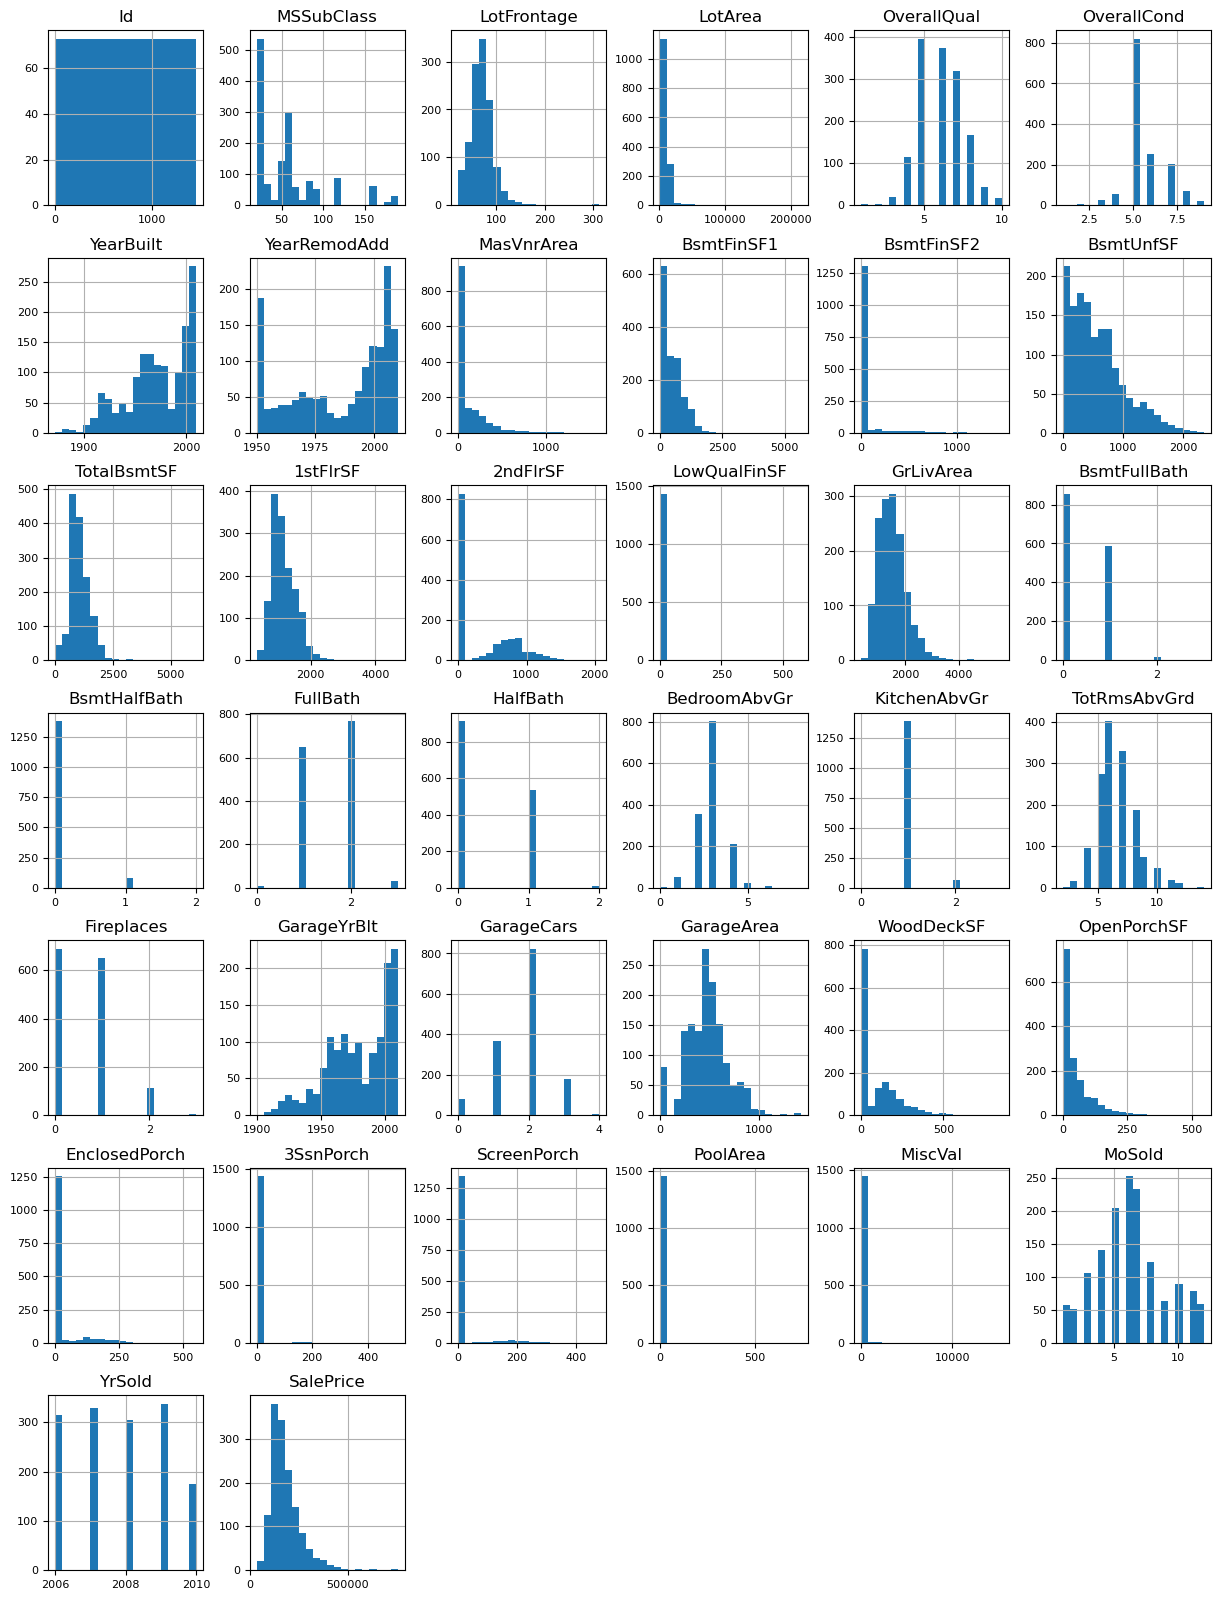

In [11]:
# Figure out the distribution of training set features
df_train_num.hist(figsize=(15, 20), bins=20,xlabelsize=8,\
                  ylabelsize=8)

plt.show()

**Check the Skewness and Kurtosis of Y-variavle 'SalePrice' in train data**

Checking the skewness and kurtosis of the target variable 'SalePrice' in the training dataset refers to examining the distribution of the target variable. Since the distribution of the target variable has a significant impact on the performance of machine learning models such as regression analysis, it is important to investigate the skewness and kurtosis of the distribution. Skewness indicates whether the distribution is symmetrical or not, with a negative value indicating left-skewed and a positive value indicating right-skewed. Kurtosis indicates how peaked the distribution is compared to the normal distribution, with a positive value indicating a more peaked distribution and a negative value indicating a flatter distribution than the normal distribution.

By understanding the shape of the distribution based on the skewness and kurtosis of the target variable, appropriate preprocessing and model selection can be performed. For example, if the skewness is high, a logarithmic transformation can be performed to bring the distribution closer to a normal distribution. If the kurtosis is high, processing outliers can bring the distribution closer to a normal distribution.

Therefore, examining the distribution of the target variable is an important step for performing appropriate preprocessing and model selection.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


Skewness: 1.882876
Kurtosis: 6.536282


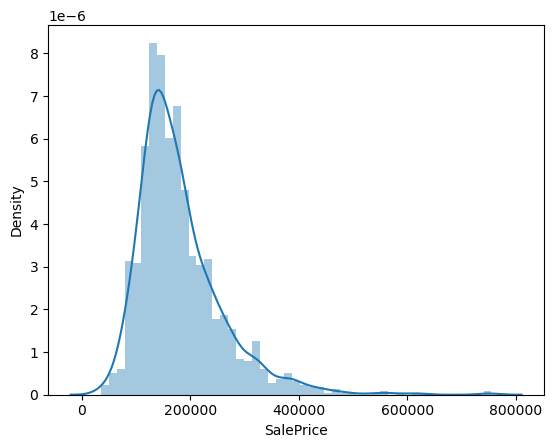

In [12]:
#check distribution of target 'SalaPrice
sns.distplot(df_train_num['SalePrice']);

#check skewness and kurtosis
print("Skewness: %f" % df_train_num['SalePrice'].skew())
print("Kurtosis: %f" % df_train_num['SalePrice'].kurt())

### Observation

If the values of skewness and kurtosis are within the range of -1 to 1, the distribution is considered to be approximately symmetric.

In this dataset, the values of skewness and kurtosis are high and not considered to follow the normal distribution, so a logarithmic transformation process is performed.

By performing a logarithmic transformation, the data distribution can be brought closer to a normal distribution, improving the performance of the machine learning model. If the skewness is high, a logarithmic transformation can be effective to bring it closer to a normal distribution. If the kurtosis is high, processing or transforming the outliers can help bring the distribution closer to a normal distribution.

**Logarithmic Transformation**

When analyzing data, it is important for the data to follow a normal distribution. A normal distribution is a bell-shaped distribution that is symmetric around the mean, making it easier to understand the data's trends and improve the performance of machine learning models.

However, real-world data does not always follow a normal distribution. For example, if you analyze sales data for a product to see which time of day it sells best, the data may be skewed toward certain times and not evenly distributed. In this case, the data may not follow a normal distribution.

To address this issue, logarithmic transformation can be used. Logarithmic transformation involves taking the logarithm of the data values to transform the original scale of the data. By performing logarithmic transformation, the skewed distribution can be transformed to be closer to a normal distribution. This can help to improve the performance of analysis and machine learning models by making skewed data closer to a normal distribution.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



Skewness: 0.121335
Kurtosis: 0.809532


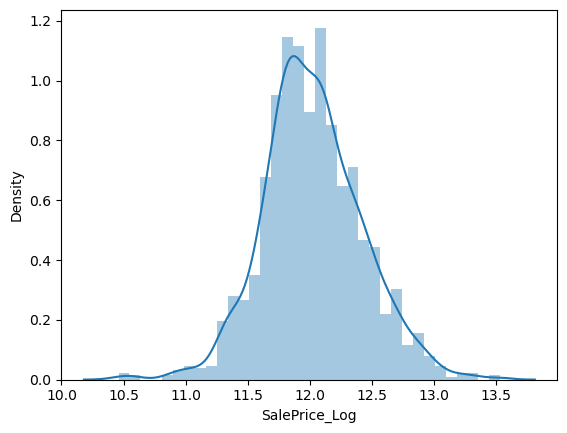

In [13]:
# logarithmic transformation 
df_train_num['SalePrice_Log'] = np.log(df_train_num['SalePrice'])

sns.distplot(df_train_num['SalePrice_Log']);


# check new skewness and kurtosis
print("Skewness: %f" % df_train_num['SalePrice_Log'].skew())
print("Kurtosis: %f" % df_train_num['SalePrice_Log'].kurt())

# dropping old column
df_train_num.drop('SalePrice', axis= 1, inplace=True)

### Observation

It was found that the skewness and kurtosis values of the variable in question were within the range of -1 to 1.

This indicates that the distribution of the data is approximately symmetrical and has a normal-like shape.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Check Test Data Distribution

Like the training data, the distribution of the test data is also important, and if the distribution is skewed, the model may not function properly.

For example, if the distribution of the test data is different from that of the training data, it suggests that the model is not properly generalized. Therefore, it is necessary to check the distribution of the test data to ensure that the model is properly generalized.

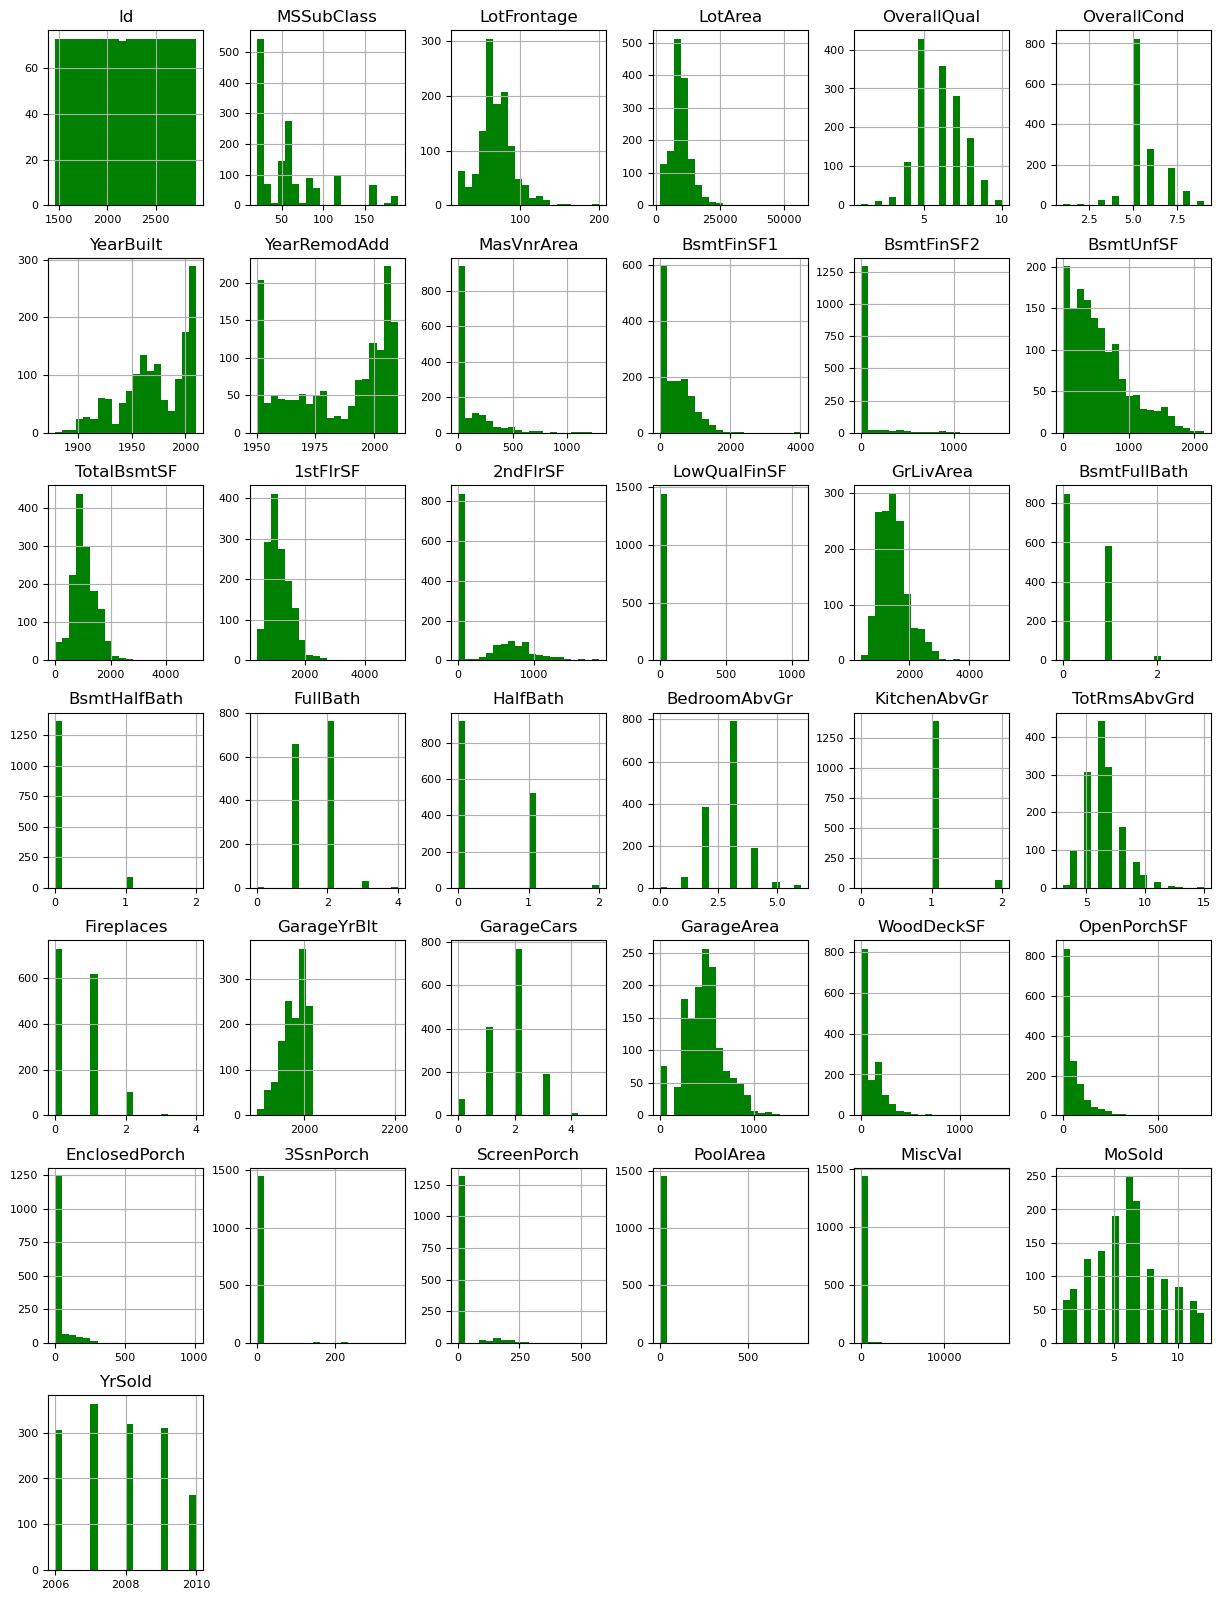

In [14]:
# Figure out the distribution of training set features
df_test_num.hist(figsize=(15, 20), bins=20,xlabelsize=8,\
                  ylabelsize=8, color='green')

plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Feature Selection

Features with constant or nearly constant variance are filtered out, as they may not be useful in predicting the machine learning model.

This process can improve the accuracy of the model by excluding the relevant features.


In this case, a threshold value of 0.05 is set and features that fall within 95% variance are considered to be almost constant and are retrieved.

**Applying this steps on the train data set**

In [15]:
# Detection of constant and quasi-constant features
from sklearn.feature_selection import VarianceThreshold


# Find the constant variance features
sel_const = VarianceThreshold(threshold=0)
# Find the quasi-constant variance features (with 95% of the same data)
sel_qsi_const = VarianceThreshold(threshold=0.05)

sel_const.fit(df_train_num)
sel_qsi_const.fit(df_train_num)

# Get the retained features from the feature selection process
ret_const = sel_const.get_support()
ret_qsi_const = sel_qsi_const.get_support()

# Return the columns that did not meet the threshold
const_columns = [col for col in df_train_num.columns if col not in\
               df_train_num.columns[ret_const]]
qsi_const_columns = [col for col in df_train_num.columns if col not\
                     in df_train_num.columns[ret_qsi_const]]

print(f"Number of features that are retained\
 after constant variance check: {sum(ret_const)}")
print(f"Number of features that are retained\
 after quasi_constant variance check: {sum(ret_qsi_const)}")
print(f"The variables that have about 95% of constant\
 values are: {qsi_const_columns}")

Number of features that are retained after constant variance check: 38
Number of features that are retained after quasi_constant variance check: 37
The variables that have about 95% of constant values are: ['KitchenAbvGr']


**Applying the same steps on the test data set**

In [16]:
sel_const.fit(df_test_num)
sel_qsi_const.fit(df_test_num)

# Get the retained features from the feature selection process
ret_const_test = sel_const.get_support()
ret_qsi_const_test = sel_qsi_const.get_support()

# Return the columns that did not meet the threshold
const_columns_test = [col for col in df_test_num.columns if col not in\
               df_test_num.columns[ret_const_test]]
qsi_const_columns_test = [col for col in df_test_num.columns if col not\
                     in df_test_num.columns[ret_qsi_const_test]]

print(f"Number of features that are retained\
 after constant variance check: {sum(ret_const_test)}")
print(f"Number of features that are retained\
 after quasi_constant variance check: {sum(ret_qsi_const_test)}")
print(f"The variables that have about 95% of constant\
 values are: {qsi_const_columns_test}")

Number of features that are retained after constant variance check: 37
Number of features that are retained after quasi_constant variance check: 36
The variables that have about 95% of constant values are: ['KitchenAbvGr']


### Observation

This filtering process determined that 'KitchenAbvGr' is a feature with nearly constant variance (< 95%). Therefore, it was excluded from the dataset.

Indeed, most ordinary houses have one (or two) kitchen(s), and it is rare to increase the number of kitchens to four or five, as if to increase the number of rooms.

KitchenAbvGr may also correlate with other feature quantities such as the size of the house and the number of rooms. For example, a large home may have multiple kitchens.　Therefore, including this feature value in the predictive model may result in overlap with other feature values. A large number of duplicated features may degrade the performance of the predictive model.


In [17]:
# dropping 'KitchenAbvGr' column
df_train_num.drop('KitchenAbvGr', axis= 1, inplace=True)
df_test_num.drop('KitchenAbvGr', axis= 1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

### Correlation

By confirming correlation, we can understand which features have an impact on the target variable. Features that have a high correlation with the target variable can be treated as important features.

Additionally, by detecting the presence of multicollinearity when there is a high correlation between features, we can avoid decreasing the model's performance or causing overfitting. It is important to identify highly correlated features and take necessary measures, such as removing features as needed.

Visually check the correlation of each feature.

While the graph is useful to get a rough idea of the relationship between a single feature and target, it does not allow comparison of the degree of influence of each feature on the target, so the following process is used

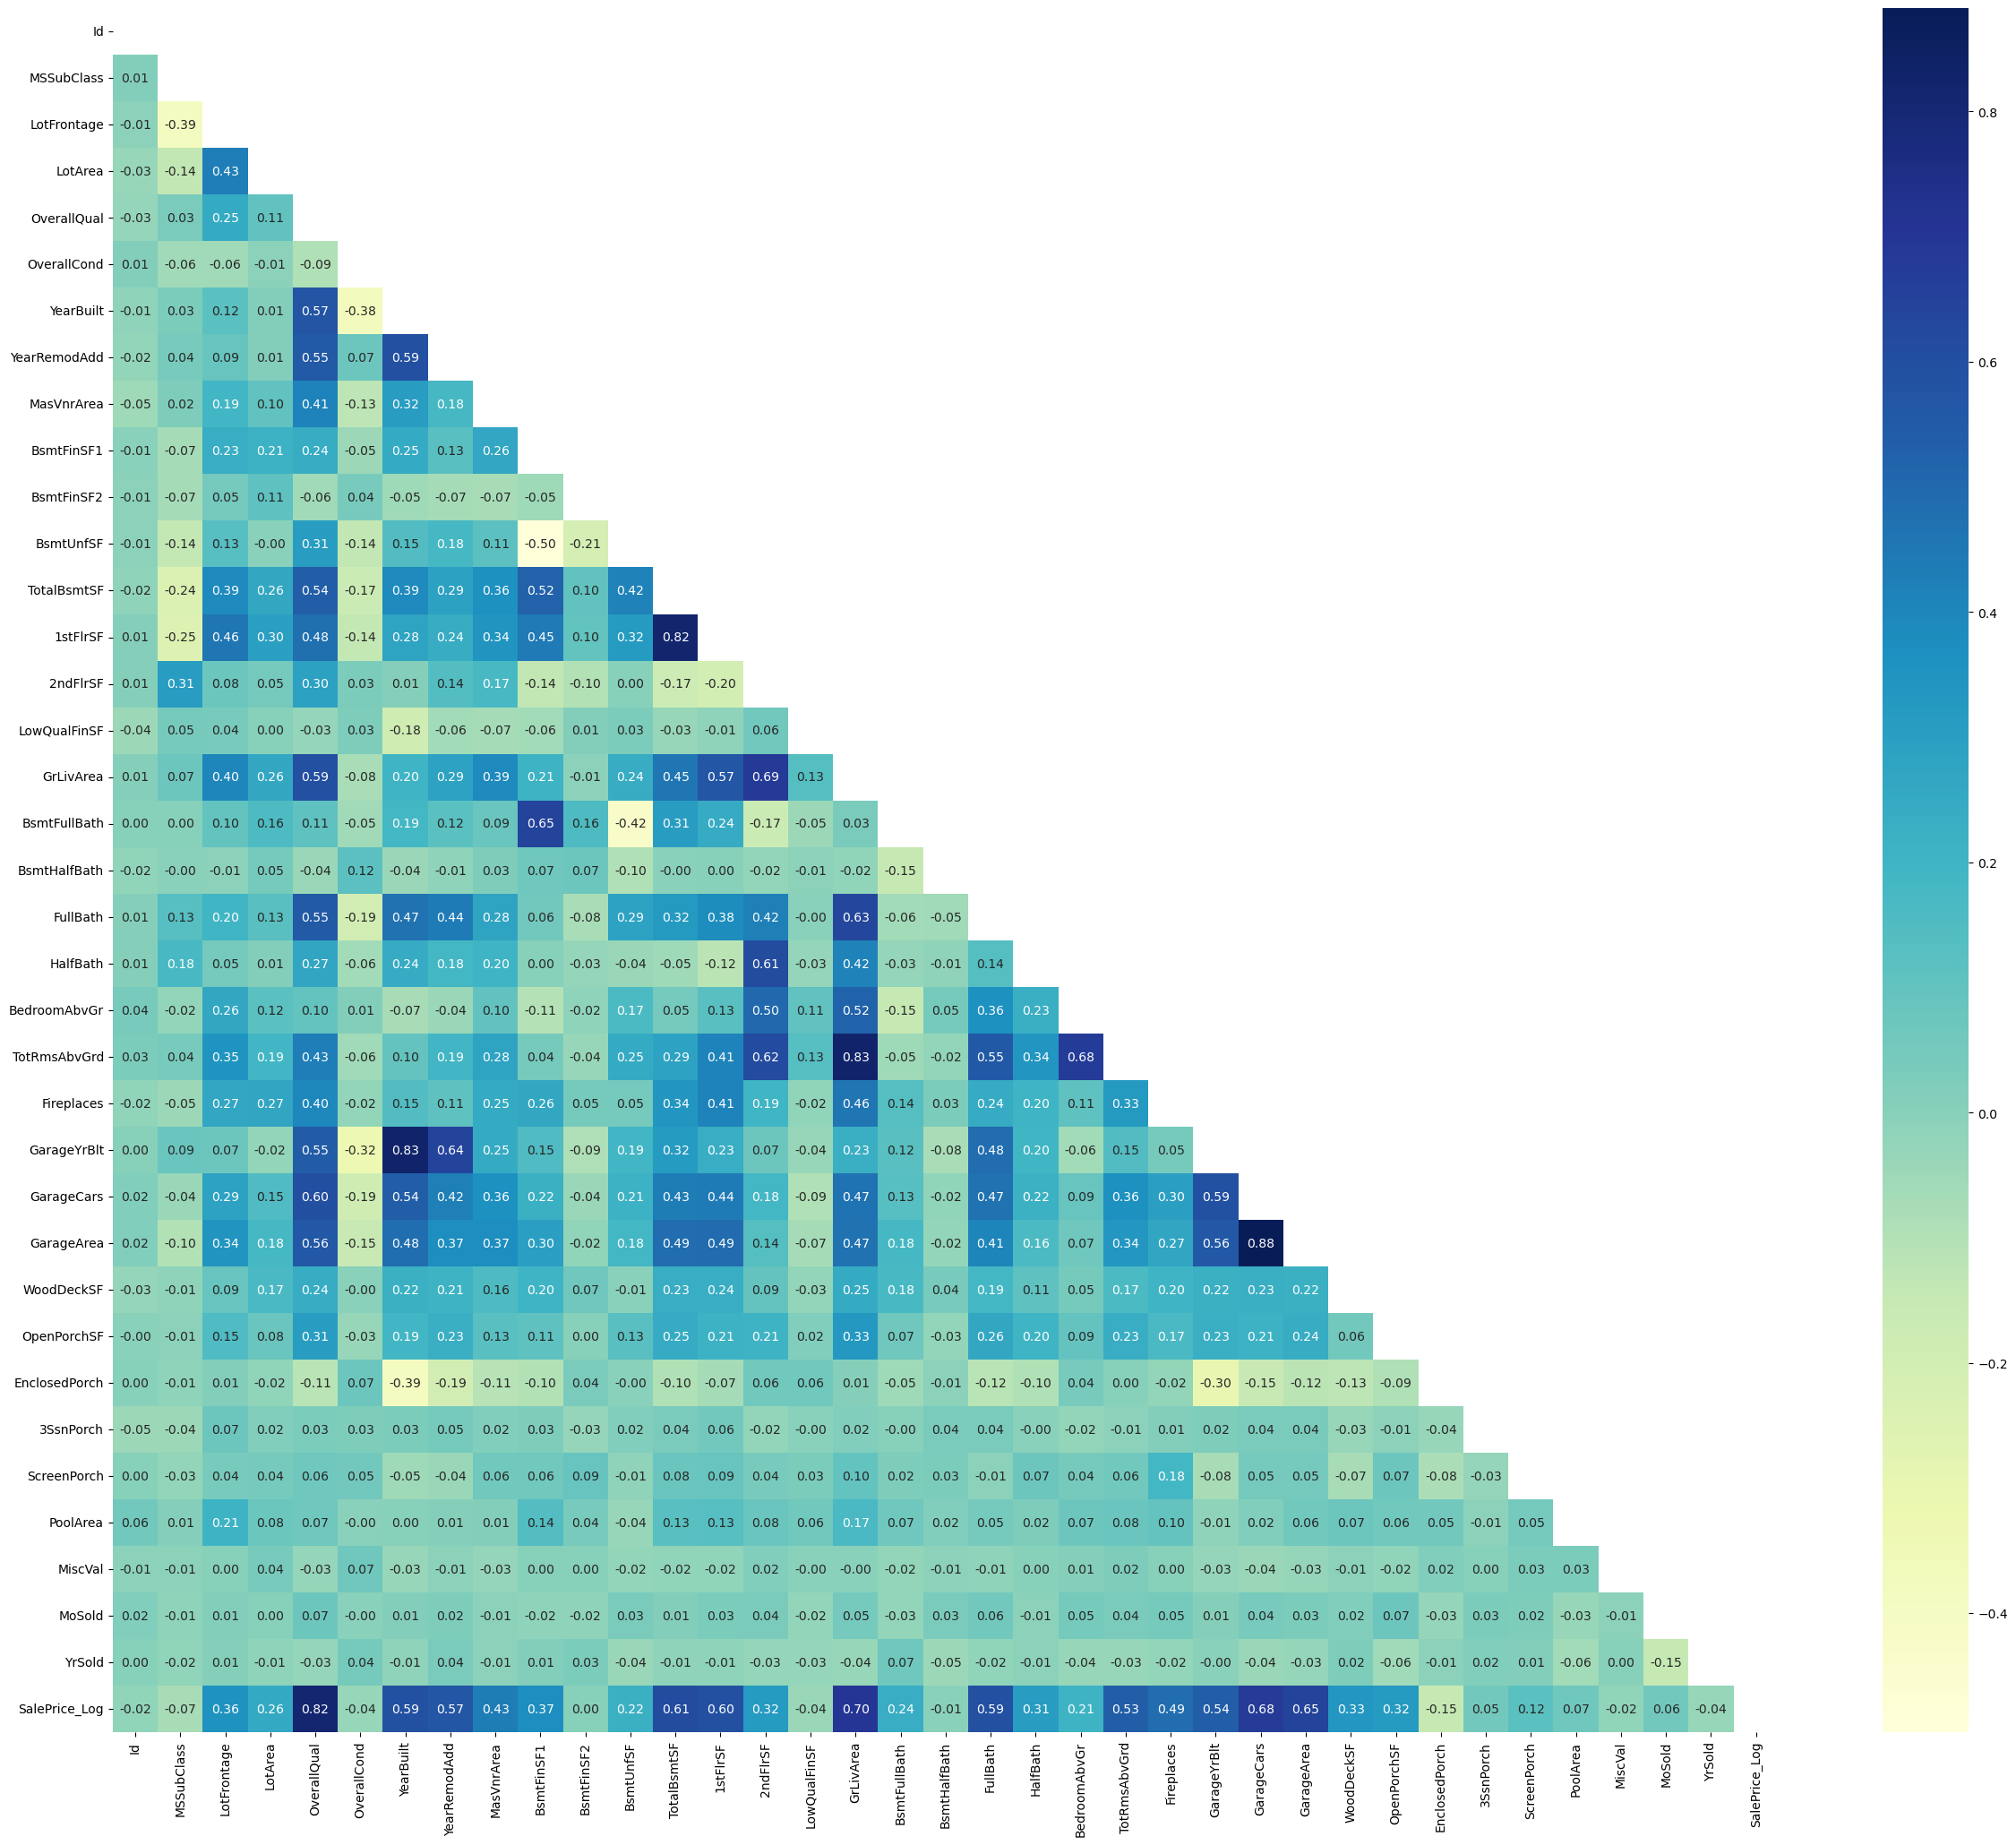

In [18]:
# modifying the figure size
plt.figure(figsize=(30,25))


# calculation of correlation among variables
corr_matrix = df_train_num.corr()


# masking the upper triangle for the heatmap since it shows the same values of correlation
mask_upp = np.triu(np.ones_like(corr_matrix, dtype=bool))


# plotting correlation heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu",annot=True, fmt='.2f',\
            mask = mask_upp)
  
    
# displaying heatmap
plt.show()

Depending on the value of the correlation coefficient, the strength of the correlation is classified as follows

Value	Strength

r = ±1	Perfectly Correlated

±0.7 ≤ r < ±1	Strongly Correlated

±0.4 ≤ r < ±0.7	Moderately Correlated

±0.1 ≤ r < ±0.4	Weakly Correlated

0 ≤ r < ±0.1	Negligible Correlation

In [19]:
# Calculate the correlation coefficient between 'SalePrice_Log' and each feature
corr_matrix = df_train_num.corr()
corr_saleprice = corr_matrix['SalePrice_Log']


# Extract features highly correlated with 'SalePrice_Log' and their correlation coefficients
corr_saleprice_bin = pd.cut(corr_saleprice, bins=[-1.0, -0.7, -0.4, 0.0, 0.4, 0.7, 1.0], labels=False, ordered=False)
high_corr_features = df_train_num.columns[corr_saleprice_bin > 2].tolist()
high_corr_features_corr = [corr_saleprice.loc[feature] for feature in high_corr_features]


# Display features and their correlation coefficients in order of increasing correlation
for feature, corr in sorted(zip(high_corr_features, high_corr_features_corr), key=lambda x: x[1], reverse=True):
    print(f'{feature}: {corr:.3f}')

SalePrice_Log: 1.000
OverallQual: 0.817
GrLivArea: 0.701
GarageCars: 0.681
GarageArea: 0.651
TotalBsmtSF: 0.612
1stFlrSF: 0.597
FullBath: 0.595
YearBuilt: 0.587
YearRemodAdd: 0.566
GarageYrBlt: 0.541
TotRmsAbvGrd: 0.534
Fireplaces: 0.489
MasVnrArea: 0.431
BsmtFinSF1: 0.372
LotFrontage: 0.356
WoodDeckSF: 0.334
OpenPorchSF: 0.321
2ndFlrSF: 0.319
HalfBath: 0.314
LotArea: 0.257
BsmtFullBath: 0.236
BsmtUnfSF: 0.222
BedroomAbvGr: 0.209
ScreenPorch: 0.121
PoolArea: 0.070
MoSold: 0.057
3SsnPorch: 0.055
BsmtFinSF2: 0.005


### Correlation Visualization

This code generates a correlation heatmap to analyze the correlation among numerical variables in the given dataset.

First, the code modifies the figure size using plt.figure(figsize=(30,25)).

Then, it calculates the correlation matrix among the numerical variables in the df_train_num dataframe using corr_matrix = df_train_num.corr().

After that, it masks the upper triangle of the correlation matrix since it shows the same values of correlation using mask_upp = np.triu(np.ones_like(corr_matrix, dtype=bool)).

Finally, it plots the correlation heatmap using sns.heatmap(corr_matrix, cmap="YlGnBu",annot=True, fmt='.2f',mask = mask_upp). The heatmap is annotated with the correlation values and the fmt='.2f' specifies that the values should be displayed up to 2 decimal places. The colormap used is "YlGnBu" which ranges from yellow to green to blue, indicating increasing values of correlation.

It is useful for visualizing the correlation among the numerical variables in the given dataset and identifying variables that are strongly correlated with each other.

The correlation heatmap is a powerful tool in data analysis and can provide valuable insights for businesses and decision-makers. By visualizing the correlation between different variables, it can help identify important relationships and patterns in the data, which can be used to make informed decisions. For example, in the context of housing prices, the heatmap can help identify which features are strongly correlated with sale price, allowing real estate professionals to prioritize these features when evaluating properties or setting prices. Similarly, in other industries, the correlation heatmap can help identify important factors that are driving business performance, customer behavior, or other key metrics. Overall, the correlation heatmap is a useful tool for anyone looking to gain insights from their data and make data-driven decisions.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

### Identify multicollinear features.

"Multicollinearity" refers to the situation where features in a regression model are strongly correlated. When multicollinearity is present, the values of regression coefficients become unstable and difficult to interpret, and prediction accuracy may be reduced or the risk of overfitting may be increased.

Therefore, identifying multicollinearity is essential to building an appropriate regression model. If multicollinearity is present, one of the highly correlated features can be removed, or dimension reduction techniques such as principal component analysis can be applied to reduce the number of features.

In [20]:
# Extract data excluding the Target
df_train_cor = df_train_num.drop(['SalePrice_Log'], axis=1)

# Calculate the correlation matrix
corr_matrix = df_train_cor.corr()

# Extract features with correlation coefficients greater than 0.7 or less than -0.7
high_corr_features = corr_matrix[((corr_matrix > 0.7) | (corr_matrix < -0.7)) & (corr_matrix != 1.0)].stack().reset_index()
high_corr_features.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Remove duplicated pairs
high_corr_features = high_corr_features.loc[high_corr_features[['Feature 1', 'Feature 2']].apply(lambda x: sorted(x), axis=1).drop_duplicates().index]

# Display Results
print(high_corr_features)

     Feature 1     Feature 2  Correlation
0    YearBuilt   GarageYrBlt     0.825667
1  TotalBsmtSF      1stFlrSF     0.819530
3    GrLivArea  TotRmsAbvGrd     0.825489
6   GarageCars    GarageArea     0.882475


In [21]:
# Highly correlated features with other features (Multicollinear features)
multicol_features = ['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

# Dropping the multicolinear features
df_train_num = df_train_num.drop(multicol_features, axis = 1)
df_test_num =  df_test_num.drop(multicol_features, axis = 1)

In [22]:
# Calculate the correlation coefficient between the objective variable "SalePrice_Log" and each numerical feature
df_num_corr = df_train_num.corr()["SalePrice_Log"][:-1]

# Storing the strongly correlated features with target variable
strong_features = list(abs(df_num_corr[df_num_corr >= 0.7]).index)

# Storing the moderately correlated features with target variable
moderate_features = list(abs(df_num_corr[(df_num_corr >= 0.4) &\
                            (df_num_corr < 0.7)]).index)

# Storing the weakly correlated features with target variable
weak_features = list(abs(df_num_corr[(df_num_corr >= 0.1) &\
                        (df_num_corr < 0.4)]).index)

# Retain these features and neglect the remaining ones
list_keep = strong_features + weak_features + moderate_features
list_keep.append('SalePrice_Log')

# Make a new dataframe with the retained features
df_train_num = df_train_num.loc[:,list_keep]
df_test_num = df_test_num.loc[:,list_keep[:-1]]

# Check for the numerical training set columns
df_train_num.loc[:, list_keep[:]]

,OverallQual,GrLivArea,LotFrontage,LotArea,BsmtFinSF1,BsmtUnfSF,2ndFlrSF,BsmtFullBath,HalfBath,BedroomAbvGr,WoodDeckSF,OpenPorchSF,ScreenPorch,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,FullBath,Fireplaces,GarageCars,SalePrice_Log
0,7,1710,65.0,8450,706,150,854,1,1,3,0,61,0,2003,2003,196.0,856,2,0,2,12.247694
1,6,1262,80.0,9600,978,284,0,0,0,3,298,0,0,1976,1976,0.0,1262,2,1,2,12.109011
2,7,1786,68.0,11250,486,434,866,1,1,3,0,42,0,2001,2002,162.0,920,2,1,2,12.317167
3,7,1717,60.0,9550,216,540,756,1,0,3,0,35,0,1915,1970,0.0,756,1,1,3,11.849398
4,8,2198,84.0,14260,655,490,1053,1,1,4,192,84,0,2000,2000,350.0,1145,2,1,3,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,62.0,7917,0,953,694,0,1,3,0,40,0,1999,2000,0.0,953,2,1,2,12.072541
1456,6,2073,85.0,13175,790,589,0,1,0,3,349,0,0,1978,1988,119.0,1542,2,2,2,12.254863
1457,7,2340,66.0,9042,275,877,1152,0,0,4,0,60,0,1941,2006,0.0,1152,2,2,1,12.493130
1458,5,1078,68.0,9717,49,0,0,1,0,2,366,0,0,1950,1996,0.0,1078,1,0,1,11.864462


In [23]:
# Check for the numerical testing set columns
df_test_num.loc[:,list_keep[:-1]]

,OverallQual,GrLivArea,LotFrontage,LotArea,BsmtFinSF1,BsmtUnfSF,2ndFlrSF,BsmtFullBath,HalfBath,BedroomAbvGr,WoodDeckSF,OpenPorchSF,ScreenPorch,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,FullBath,Fireplaces,GarageCars
0,5,896,80.0,11622,468.0,270.0,0,0.0,0,2,140,0,120,1961,1961,0.0,882.0,1,0,1.0
1,6,1329,81.0,14267,923.0,406.0,0,0.0,1,3,393,36,0,1958,1958,108.0,1329.0,1,0,1.0
2,5,1629,74.0,13830,791.0,137.0,701,0.0,1,3,212,34,0,1997,1998,0.0,928.0,2,1,2.0
3,6,1604,78.0,9978,602.0,324.0,678,0.0,1,3,360,36,0,1998,1998,20.0,926.0,2,1,2.0
4,8,1280,43.0,5005,263.0,1017.0,0,0.0,0,2,0,82,144,1992,1992,0.0,1280.0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,21.0,1936,0.0,546.0,546,0.0,1,3,0,0,0,1970,1970,0.0,546.0,1,0,0.0
1455,4,1092,21.0,1894,252.0,294.0,546,0.0,1,3,0,24,0,1970,1970,0.0,546.0,1,0,1.0
1456,5,1224,160.0,20000,1224.0,0.0,0,1.0,0,4,474,0,0,1960,1996,0.0,1224.0,1,1,2.0
1457,5,970,62.0,10441,337.0,575.0,0,0.0,0,3,80,32,0,1992,1992,0.0,912.0,1,0,0.0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Data Cleaning

"Data cleaning" is the process of identifying and correcting missing, outlier, and duplicate data. It improves the quality of the data, making more accurate analysis possible.

Data cleaning can also remove data that contains noise or distortions. This improves the accuracy of the model and allows for more accurate forecasts.

### Delete rows with the terget is missing

If a row contains a missing target variable, the data in that row cannot be used to train a machine learning model. While missing values can be predicted, the model's performance may be impacted if training data contains missing values.

Thus, removing those rows can improve model accuracy.

In [24]:
# Dropping rows if the target is missing
Target = 'SalePrice_Log'
df_train_num.dropna(axis=0, subset=[Target], inplace=True)

# 'dropna()'-- Deletes the specified row or column if it has missing values.

### Generate list of features with missing values

By extracting features with missing values, we can identify the number and location of missing values and perform the appropriate processing.

This allows us to determine if we need to drop the row or fill in the missing values with an appropriate method like mean, median, or mode.

In [25]:
# Looking for Missing Values in train data[df_train_num]
# display for missing % of each columns

def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent_nan'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(df_train_num)

,Total,Percent_nan
LotFrontage,259,17.74
MasVnrArea,8,0.55


In [26]:
# Looking for Missing Values in test data[df_test_num]
# display for missing % of each columns

def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent_nan'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(df_test_num)

,Total,Percent_nan
LotFrontage,227,15.56
MasVnrArea,15,1.03
BsmtFullBath,2,0.14
GarageCars,1,0.07
BsmtFinSF1,1,0.07
BsmtUnfSF,1,0.07
TotalBsmtSF,1,0.07


### Observation
Except for 'LotFrontage', the other items represent only 1% of each feature.

An analysis is performed to examine how the missing values are filled for 'LotFrontage'.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


Skewness: 2.163569
Kurtosis: 17.452867


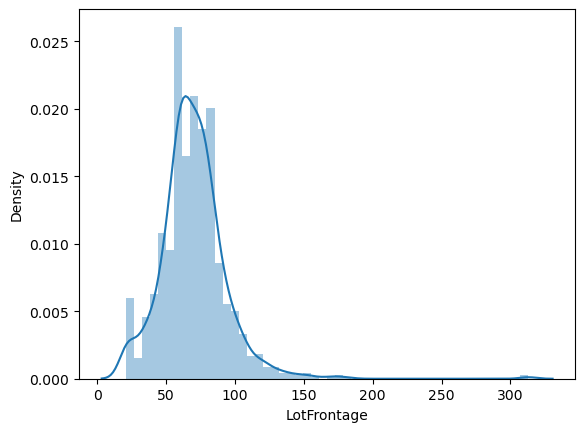

In [27]:
#check distribution of 'LotFrontage'
sns.distplot(df_train_num['LotFrontage']);

#check skewness and kurtosis
print("Skewness: %f" % df_train_num['LotFrontage'].skew())
print("Kurtosis: %f" % df_train_num['LotFrontage'].kurt())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


Skewness: 0.661921
Kurtosis: 2.587216


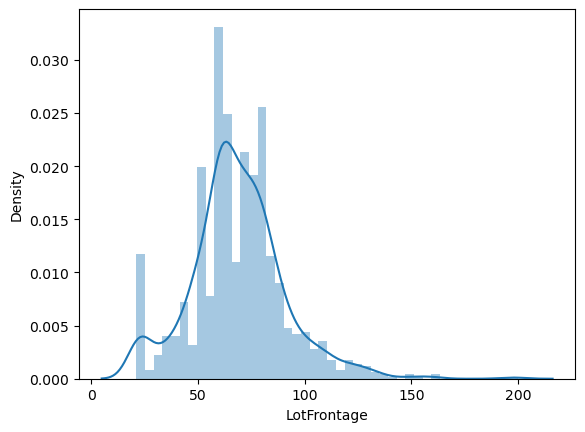

In [28]:
#check distribution of 'LotFrontage'
sns.distplot(df_test_num['LotFrontage']);

#check skewness and kurtosis
print("Skewness: %f" % df_test_num['LotFrontage'].skew())
print("Kurtosis: %f" % df_test_num['LotFrontage'].kurt())

### Lot Frontage

The above code is visualizing the distribution of the 'LotFrontage' variable in the training dataset using a histogram (via the seaborn distplot function) and printing out its skewness and kurtosis values. Skewness measures the degree of asymmetry in the distribution of the variable, with positive values indicating a right-skewed (long-tailed on the positive side) distribution and negative values indicating a left-skewed (long-tailed on the negative side) distribution. Kurtosis measures the degree of peakedness or flatness in the distribution of the variable, with higher values indicating more peaked (leptokurtic) and lower values indicating more flat (platykurtic) distributions, while a value of 3 corresponds to a normal distribution.

The above code is specifically checking the distribution of the 'LotFrontage' variable to assess its normality, which is an assumption for many statistical models. The histogram shows that the distribution is somewhat skewed to the right, with a peak around 60 and a long tail towards the higher values. The skewness value of 2.163 indicates a moderate to high degree of right-skewness, which might affect the accuracy of the statistical models. The kurtosis value of 17.450 indicates a highly leptokurtic distribution, which means that the variable has many outliers or extreme values relative to a normal distribution.

The distribution of a variable can provide valuable insights for data analysis and modeling. For example, a variable that is normally distributed can be useful for certain statistical tests and machine learning models that assume a normal distribution. On the other hand, a skewed distribution can indicate that the data may need to be transformed before analysis to improve model performance or accuracy. Similarly, kurtosis can provide information about the shape of the distribution and the presence of outliers. In general, understanding the distribution of variables can help in identifying potential issues or limitations in the data, selecting appropriate analysis methods, and improving the accuracy of predictions or inferences.

### Observation

The distribution of 'LotFrontage' was found to be different for Train and Test data. This may affect the accuracy of the model after training.

In some cases, it is possible to match the distributions by logarithmic transformation on features whose distributions differ between Train and Test data.

However, if a logarithmic transformation is forcibly performed, the feature may become less effective in contributing to the prediction of the model, or conversely, the prediction accuracy may be reduced.



Therefore, it may be better to develop the model without adopting the feature as a feature rather than forcibly matching it.



However, even in cases where a feature is not adopted, insights that lead to model improvement may be gained by considering why the distribution differs.

**Note: Why are the distributions different?**

The reason why the distribution of a feature may be different between the train and test data is due to differences in the data collection methods, collection time, sample size, and so on. For example, if the train data was collected at a different time than the test data, the distribution of the test data may change.

In such cases, there is a possibility that the model's performance will deteriorate. Since the model fits to the train data, if the distribution of the test data is different, the model may not be able to predict correctly. Therefore, if there are features with different distributions between the train and test data, it is necessary to perform data preprocessing or feature engineering to make the distributions as close as possible between the train and test data.

Therefore, instead of filling in the missing values of 'LotFrontage' and adopting it as a feature in the development of the model, a decision is made not to adopt it as a feature.

### Dropping column

In [29]:
# dropping 'LotFrontage' column
df_train_num.drop('LotFrontage', axis= 1, inplace=True)
df_test_num.drop('LotFrontage', axis= 1, inplace=True)

### Filling missing values
Missing values can be filled using alternative values such as mean, median, or mode if the missing value is numerical data.

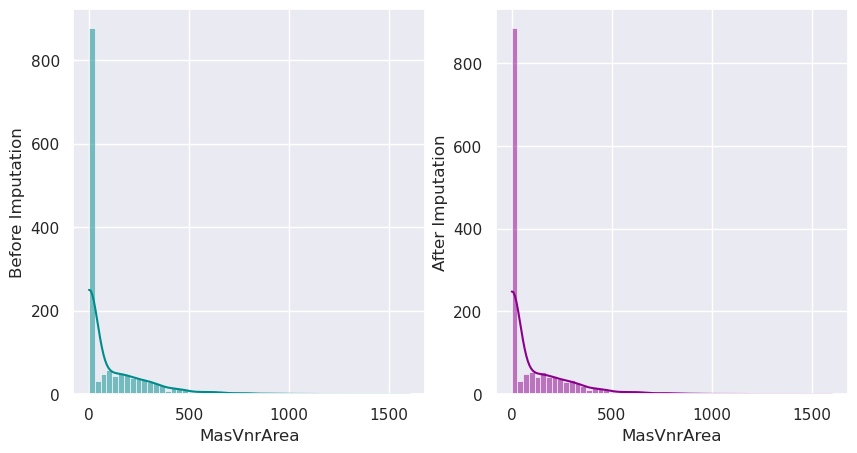

In [30]:
# For train data(df_train_num)

# Importing the library for imputation method
from sklearn.impute import SimpleImputer

# Initiating the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
list_missing_train = ['MasVnrArea']

# Filling the missing values with the median of the column
df_train_impute = pd.DataFrame(imputer.fit_transform(df_train_num),\
                              columns = df_train_num.columns)

# Visualizing the distribution before and after imputation
sns.set(rc={"figure.figsize":(10, 5)})
fig, axes = plt.subplots(1, 2)

# Before imputation
sns.histplot(ax=axes[0], x=df_train_num['MasVnrArea'], kde=True, color='darkcyan')
axes[0].set_ylabel('Before Imputation')

# After imputation
sns.histplot(ax=axes[1], x=df_train_impute['MasVnrArea'], kde=True, color='darkmagenta')
axes[1].set_ylabel('After Imputation')

plt.show()

### Before Imputation Visualization

The avobe code is performing missing value imputation for the 'MasVnrArea' column in the training data using SimpleImputer from scikit-learn library. The missing values are replaced with the median of the column. The code also visualizes the distribution of the column before and after imputation using a histogram plot. The left plot shows the distribution before imputation while the right plot shows the distribution after imputation. The plots can help to check if the imputation method used is appropriate and if it has changed the distribution of the column significantly. In this case, we can see that the distribution after imputation is similar to the original distribution before imputation.

Data imputation is a crucial step in data preprocessing as it helps in dealing with missing values. Missing values can occur due to various reasons such as data entry errors, equipment failure, or even due to privacy concerns. It is important to handle missing values appropriately as they can cause bias in the analysis and can also affect the accuracy of the predictions made using the data. In the above code, the SimpleImputer method from scikit-learn library is used to impute the missing values in the 'MasVnrArea' column of the training dataset. The visualization before and after imputation helps in understanding the effect of imputation on the distribution of the data. This can provide useful insights on the impact of imputation on the underlying data distribution, and can help in making informed decisions during the preprocessing stage.

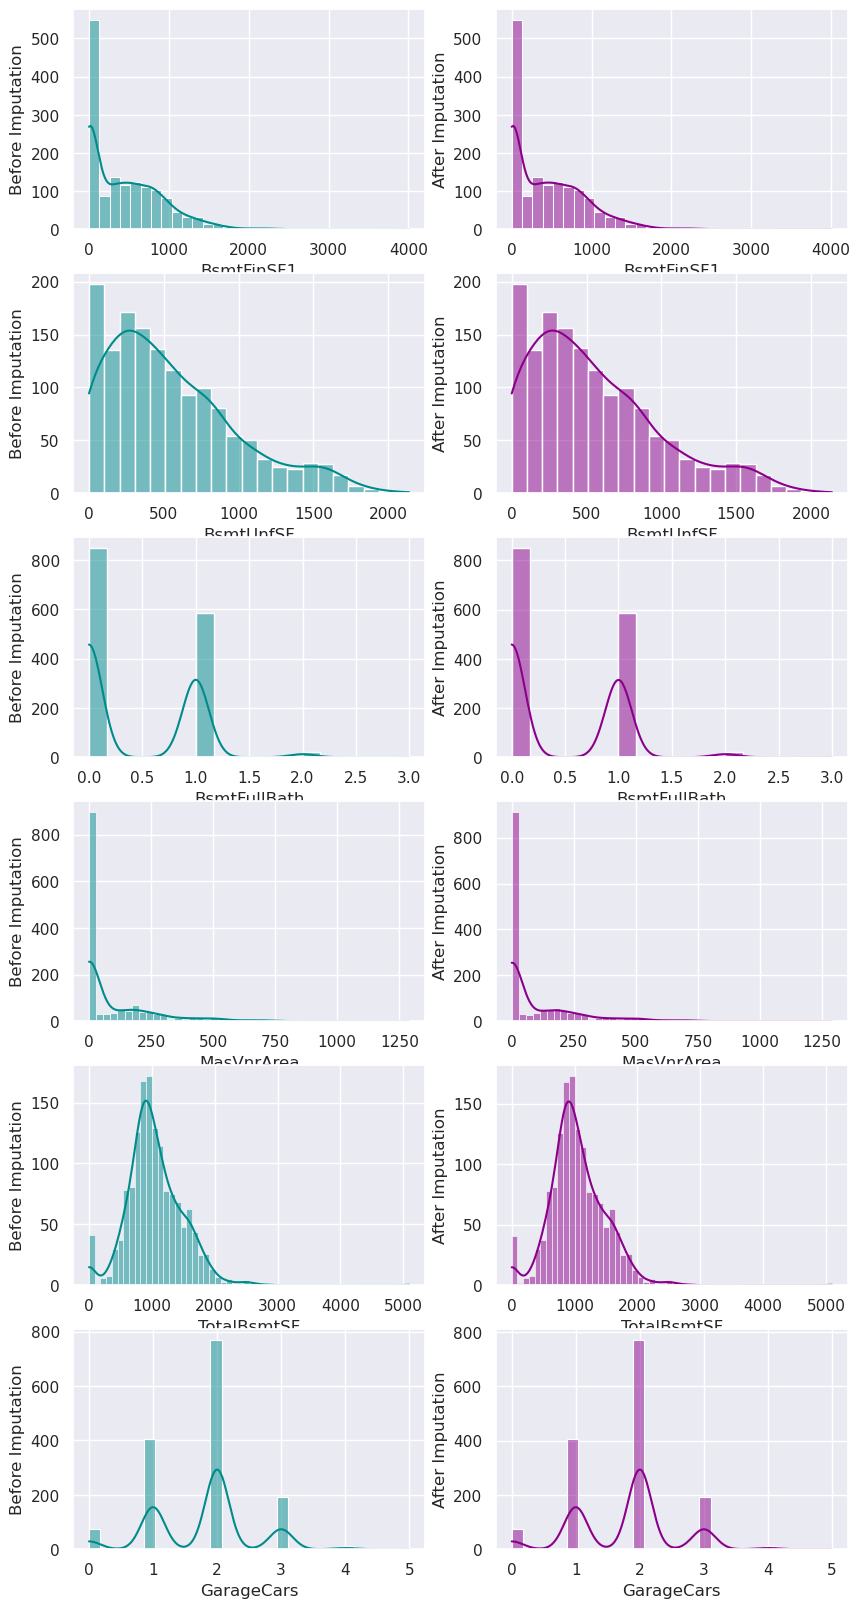

In [31]:
# For test data(df_test_num)

# Filling the missing values with the median of the column
list_missing_test = ['BsmtFinSF1', 'BsmtUnfSF', 'BsmtFullBath','MasVnrArea', 'TotalBsmtSF', 'GarageCars']
df_test_impute = pd.DataFrame(imputer.fit_transform(df_test_num),\
                              columns = df_test_num.columns)

# Visualizing the distribution before and after imputation
sns.set(rc={"figure.figsize":(10, 20)})
fig, axes = plt.subplots(6, 2)
for col, fig_row in zip(list_missing_test,range(0, 7)):
    before_impute = sns.histplot(ax=axes[fig_row,0],\
                                 x=df_test_num[col],\
                                 kde=True, color='darkcyan')
    before_impute.set(ylabel='Before Imputation')
    after_impute = sns.histplot(ax=axes[fig_row,1],\
                                 x=df_test_impute[col],\
                                 kde=True, color='darkmagenta')
    after_impute.set(ylabel='After Imputation')

･It was confirmed that none of the features affected the distribution of the original data after the assignment of missing values.

### After Imputatiom Visualization

It seems that the code is imputing missing values in the test dataset and then visualizing the distribution of the variables before and after the imputation process using histograms. The missing values are filled with the median value of the corresponding columns. The code is useful because imputing missing values can help to reduce the impact of missing data on the predictive model and ensure that all variables are available for analysis. Visualizing the distribution of variables before and after imputation helps to understand the impact of imputation on the distribution of variables and check if it has changed significantly.

The process of imputing missing values in a dataset is a common practice in data analysis and machine learning. It involves filling in missing values with estimated values based on the available data, and it can help to improve the accuracy of predictive models.

Visualizing the distribution of data before and after imputation can also be helpful in understanding how imputation affects the data. By comparing the histograms of the original and imputed data, we can see if the imputation process has significantly changed the distribution of the data, which could potentially affect the accuracy of our models.

In [32]:
# Double Check for Missing Values in train data[df_train_impute]
# display for missing % of each columns

def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent_nan'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(df_train_impute)

,Total,Percent_nan


In [33]:
# Double Check for Missing Values in test data[df_test_impute]
# display for missing % of each columns

def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent_nan'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(df_test_impute)

,Total,Percent_nan


**Comment**

･The processing of the missing values was confirmed to be complete.


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Categorical Features Exploration

Categorical features are variables that take on categorical values that have no numerical meaning, e.g., color, country, type, etc. Unlike numerical features, these features cannot be directly input into the model. Therefore, categorical features must be converted to numerical features.

Categorical Features Exploration involves the following:

Checking the distribution of categorical features: Before inputting categorical features into the model, it is important to check their distribution. Certain categories may be extremely abundant or rarely appear, requiring special processing.

Selecting an encoding method: There are several methods for encoding categorical features, including One-Hot Encoding, Label Encoding, and Target Encoding. Choosing the appropriate method can impact the model's performance.

Checking the features after encoding: It is important to check the encoded features to see how the correlation between the features is. If the correlations are strong, they may contain redundant information.

Overall, Categorical Features Exploration is a crucial step in improving the performance of a machine learning model.

In [34]:
# Selecting the categorical features
df_train_cat = df_train.select_dtypes('object')
df_test_cat = df_test.select_dtypes('object')

# Checking for the new dataframes
df_train_cat.info()
df_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Missing data in categorical features

In [35]:
# Looking for Missing Values in train data[df_train_cat]
# display for missing % of each columns

def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent_nan'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(df_train_cat)

,Total,Percent_nan
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
GarageType,81,5.55
GarageCond,81,5.55
GarageQual,81,5.55
GarageFinish,81,5.55
BsmtFinType2,38,2.60


## 

In [36]:
# Looking for Missing Values in test data[df_test_cat]
# display for missing % of each columns

def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent_nan'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(df_test_cat)

,Total,Percent_nan
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
GarageCond,78,5.35
GarageQual,78,5.35
GarageFinish,78,5.35
GarageType,76,5.21
BsmtCond,45,3.08


### Observation

In this case, completion on features with missing values of 40% or more may produce new data with a distribution different from the original data.


In order to avoid the possibility that the completion of missing values using such uncertainty may reduce the accuracy of the forecasting model and result in incorrect forecasts, features with missing values of 40% or more are removed.

### Drop Columns



In [37]:
# Dropping features with high percentage of missing values
df_train_cat = df_train_cat.drop(['PoolQC','MiscFeature','Alley','Fence', 'FireplaceQu'], axis=1) 
df_test_cat = df_test_cat.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1)

# Check the number of columns after dropping
print(df_train_cat.shape)
print(df_test_cat.shape)

(1460, 38)
(1459, 38)


In this case, a correction for missing values of about 5% is acceptable, and the mode is used to supplement the missing values.

In [38]:
# Filling the missing values with the mode value in each feature
df_train_cat = df_train_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_test_cat = df_test_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))

# Check if there are any features with missing values
print(df_train_cat.loc[:, df_train_cat.isnull().any()].columns)
print(df_test_cat.loc[:, df_test_cat.isnull().any()].columns)

Index([], dtype='object')
Index([], dtype='object')


confirmed that all missing values were eliminated for categorical data as well.

In categorical data, features with constant or nearly constant variance are filtered out because they may not be useful in predicting machine learning models.

This process improves the accuracy of the model by excluding relevant features.

In this case, a threshold value of 0.11 is set and features that fall within 89% variance are considered almost constant and are retrieved.

In [39]:
# Get the percentage of each value for each feature and output features with over 89% of the same values
over89 = [] # create an empty list to store feature names

for feature in df_train_cat.columns:
    value_counts = df_train_cat[feature].value_counts(normalize=True)
    most_frequent_value_percentage = value_counts.iloc[0]
    if most_frequent_value_percentage >= 0.89: # if the most frequent value's percentage is over 89%
        over89.append(feature) # add the feature name to the list
        print(f"Feature: {feature}")
        print(value_counts)
        print(f"Most frequent value percentage: {most_frequent_value_percentage:.2%}")
        print("------------------------")

        
print(f"Features with over 89% of the same values: {over89}")

Feature: Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
Most frequent value percentage: 99.59%
------------------------
Feature: LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Most frequent value percentage: 89.79%
------------------------
Feature: Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
Most frequent value percentage: 99.93%
------------------------
Feature: LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64
Most frequent value percentage: 94.66%
------------------------
Feature: Condition2
Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: Condition2, dtype: float64
Most frequent value percentage: 98.97%
------------------------
Feature: RoofMatl
CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.

**Applying the same steps on the test data set**

In [40]:
# Get the percentage of each value for each feature and output features with over 89% of the same values
over89 = [] # create an empty list to store feature names

for feature in df_test_cat.columns:
    value_counts = df_test_cat[feature].value_counts(normalize=True)
    most_frequent_value_percentage = value_counts.iloc[0]
    if most_frequent_value_percentage >= 0.89: # if the most frequent value's percentage is over 89%
        over89.append(feature) # add the feature name to the list
        print(f"Feature: {feature}")
        print(value_counts)
        print(f"Most frequent value percentage: {most_frequent_value_percentage:.2%}")
        print("------------------------")

        
print(f"Features with over 89% of the same values: {over89}")

Feature: Street
Pave    0.995888
Grvl    0.004112
Name: Street, dtype: float64
Most frequent value percentage: 99.59%
------------------------
Feature: LandContour
Lvl    0.898561
HLS    0.047978
Bnk    0.037012
Low    0.016450
Name: LandContour, dtype: float64
Most frequent value percentage: 89.86%
------------------------
Feature: Utilities
AllPub    1.0
Name: Utilities, dtype: float64
Most frequent value percentage: 100.00%
------------------------
Feature: LandSlope
Gtl    0.956820
Mod    0.041124
Sev    0.002056
Name: LandSlope, dtype: float64
Most frequent value percentage: 95.68%
------------------------
Feature: Condition2
Norm      0.989719
Feedr     0.004798
PosA      0.002056
Artery    0.002056
PosN      0.001371
Name: Condition2, dtype: float64
Most frequent value percentage: 98.97%
------------------------
Feature: RoofMatl
CompShg    0.988348
Tar&Grv    0.008225
WdShake    0.002742
WdShngl    0.000685
Name: RoofMatl, dtype: float64
Most frequent value percentage: 98.83%
-

Train Data:

Features with over 89% of the same values: ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive']

Test Data:

Features with over 89% of the same values: ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive']

### Observation

This filtering process determined that,

'Street','LandContour','Utilities','LandSlope','Condition2','RoofMatl','BsmtCond','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive' are features with nearly constant variance (< 89%).

Therefore, it was excluded from the dataset.

In [41]:
# dropping Features with constant
drop_list = ['Street','LandContour', 'Utilities', 'LandSlope', 'Condition2',\
             'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir',\
             'Electrical', 'Functional', 'GarageQual',\
             'GarageCond', 'PavedDrive']

# Drop the quasi constant columns
df_train_cat = df_train_cat.drop(drop_list, axis=1)
df_test_cat = df_test_cat.drop(drop_list, axis=1)

In [42]:
# Check the number of columns after dropping
print(df_train_cat.shape)
print(df_test_cat.shape)

(1460, 24)
(1459, 24)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## The distribution of Categorical features and Target Feature

By observing the distribution of categorical data, it is possible to understand the frequency of occurrence, relative proportions, and imbalance of categories in a data set. This allows us to understand the characteristics of the data and assess the quality of the data.

In addition, by visualizing the distribution of categorical data in graphs and charts, trends and patterns in the data can be easily understood. This facilitates visual understanding of the data.



Dataset of 'df_train_cat' is only categorical data, combining the 'SalePrice'.

In [43]:
# Joining the target variable to the categorical set
df_train_cat = df_train_cat.join(df_train['SalePrice'])

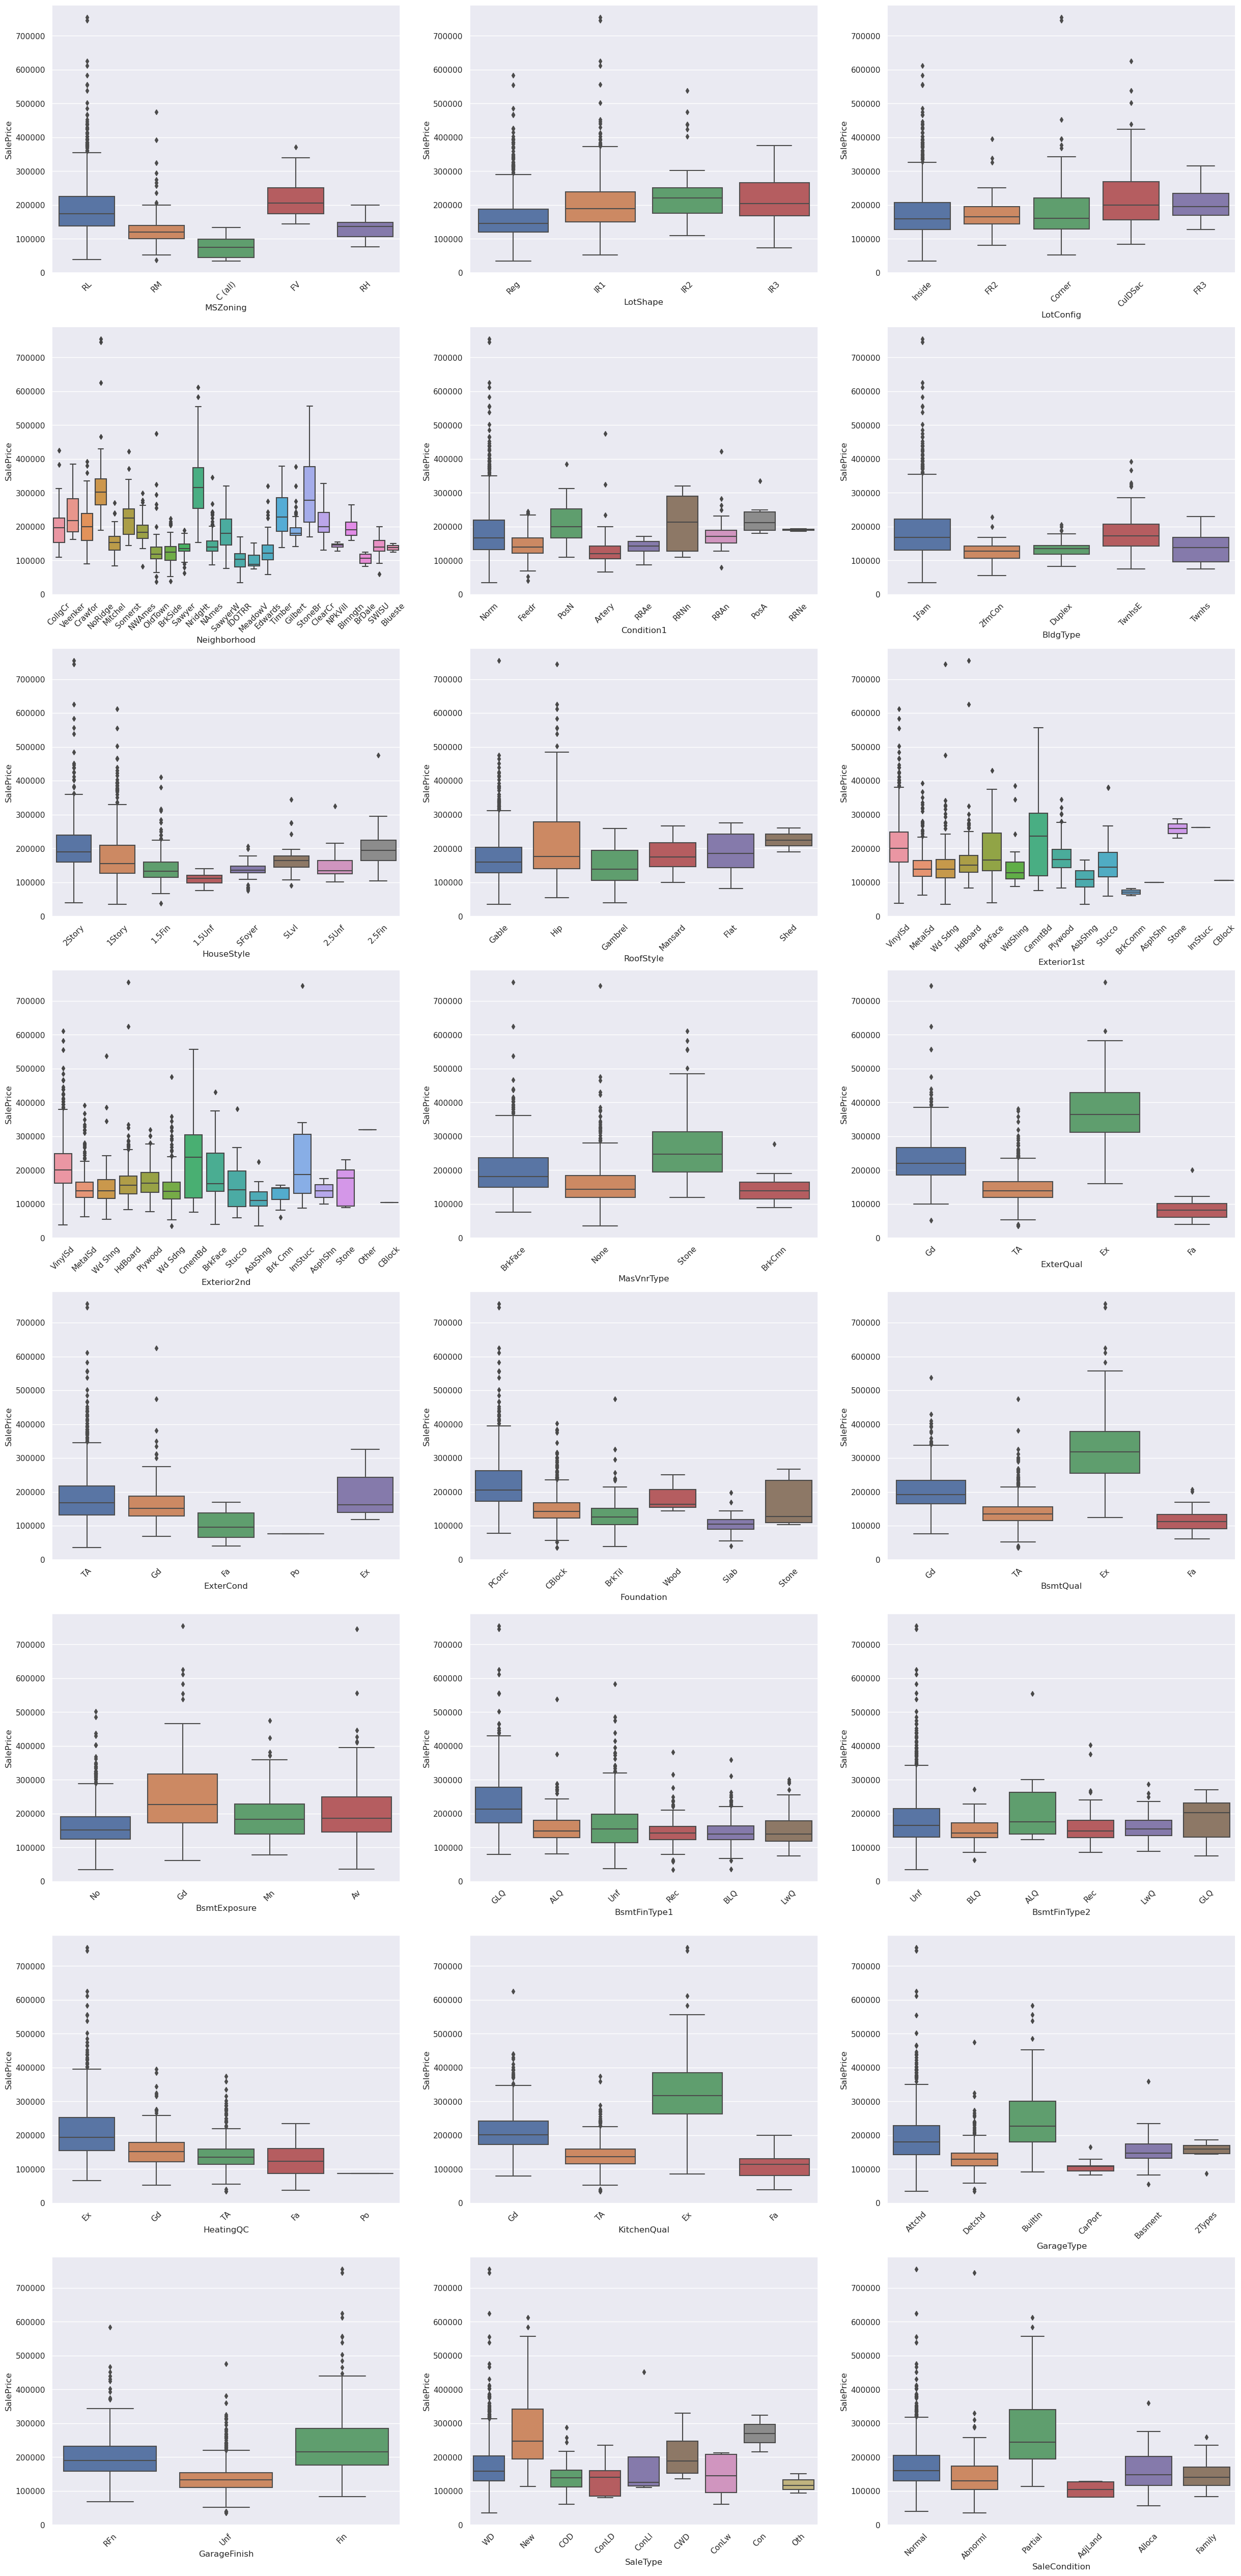

In [44]:
# Figure out the distribution of observations in each categorical feature
count=1
plt.subplots(figsize=(30, 130))
for i in df_test_cat.columns:
    plt.subplot(16,3,count)
    sns.boxplot(data = df_train_cat, x = i, y = 'SalePrice')
    count+=1

    plt.xticks(rotation = 45)
plt.show()

### Plotting Subplots

This code is creating a boxplot for each categorical feature in the df_test_cat dataframe with SalePrice on the y-axis. The purpose of this is to visualize the relationship between the categorical features and the target variable SalePrice. By looking at these plots, we can get an idea of which categorical features have a strong or weak relationship with SalePrice and can use this information to make decisions about which features to include or exclude in our machine learning models.

This code is plotting boxplots for the relationship between each categorical feature and the target variable 'SalePrice' in the training set. The purpose of this plot is to visualize any potential correlations between categorical variables and the target variable, which can help inform feature selection and engineering strategies for the predictive model. By examining these plots, one can identify whether certain categories within a categorical feature have a higher or lower SalePrice than others, and this information can be used to create new features or drop irrelevant ones.

In [45]:
# Dropping the target variable from the training set
df_train_cat.drop('SalePrice', axis=1, inplace=True)

The top 10 Cramer's V values are extracted to numerically confirm the dependence among each categorical variable.

In [46]:
# Get a list of categorical variables
cat_vars = list(df_test_cat.select_dtypes(include=['object']).columns)

# Create a list of all possible combinations of categorical variables
combos = list(itertools.combinations(cat_vars, 2))

# Create an empty list to store the results
results = []

# Loop through each combination and perform a chi-square test and calculate Cramer's V
for combo in combos:
    cross_tab = pd.crosstab(df_test_cat[combo[0]], df_test_cat[combo[1]])
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(cross_tab)
    n = cross_tab.sum().sum()
    phi2 = chi2_stat/n
    r, k = cross_tab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    
    # Add the results to the list
    results.append((combo[0], combo[1], cramers_v, chi2_stat, p_val))

# Sort the list by Cramer's V in descending order and take the top 10
top_10 = sorted(results, key=lambda x: x[2], reverse=True)[:10]

# Print the top 10
for i, result in enumerate(top_10):
    print(f"Top {i+1}: {result[0]} and {result[1]} - Cramer's V: {result[2]:.4f} - Chi-squared: {result[3]:.4f} - P-value: {result[4]:.4f}")

Top 1: Exterior1st and Exterior2nd - Cramer's V: 0.7874 - Chi-squared: 10934.7180 - P-value: 0.0000
Top 2: MSZoning and Neighborhood - Cramer's V: 0.6471 - Chi-squared: 2533.4423 - P-value: 0.0000
Top 3: Neighborhood and BsmtQual - Cramer's V: 0.5566 - Chi-squared: 1425.4242 - P-value: 0.0000
Top 4: ExterQual and KitchenQual - Cramer's V: 0.5516 - Chi-squared: 1338.0381 - P-value: 0.0000
Top 5: Neighborhood and ExterQual - Cramer's V: 0.4988 - Chi-squared: 1158.7910 - P-value: 0.0000
Top 6: Neighborhood and GarageFinish - Cramer's V: 0.4958 - Chi-squared: 764.4873 - P-value: 0.0000
Top 7: SaleType and SaleCondition - Cramer's V: 0.4753 - Chi-squared: 1682.1894 - P-value: 0.0000
Top 8: ExterQual and BsmtQual - Cramer's V: 0.4751 - Chi-squared: 994.9601 - P-value: 0.0000
Top 9: BsmtQual and KitchenQual - Cramer's V: 0.4653 - Chi-squared: 954.7473 - P-value: 0.0000
Top 10: Neighborhood and KitchenQual - Cramer's V: 0.4448 - Chi-squared: 936.3551 - P-value: 0.0000


The above results indicate that there is a significant correlation between the two categorical variables.

The Chi-Squared and Cramer's V indicate that there is a very strong relationship between each pair of variables.

Also, a P-value less than 5% indicates that the difference is highly significant and not due to chance.

Therefore, we can conclude that the following combinations are highly correlated in terms of numerical values.

Furthermore, by looking at the combinations in detail, we can determine the features that can be removed by placing them in the model development.

### Observation

Looking at the TOP 10 combinations above, it appears that the quality of each part of the house is influenced and correlated by the location.

For example, the better the location, the higher the quality of the house, the more luxurious the interior, and the more luxurious the kitchen tends to be.

The combination of Exterior1st and Exterior2nd was chosen to remove Exterior2nd because it deals with the same thing in this TOP10 and removing one or the other would have little impact.

In [47]:
# Features to be dropped
to_drop = ['Exterior2nd']

df_train_cat.drop(to_drop, axis=1, inplace=True)
df_test_cat.drop(to_drop, axis=1, inplace=True)

In [48]:
# Get the final shape of the categorical features
print(f'The number of features in the training dataset are:{df_train_cat.shape[1]}')
print(f'The number of features in the testing dataset are:{df_test_cat.shape[1]}')

The number of features in the training dataset are:23
The number of features in the testing dataset are:23


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

##  Applying one-hot label encoding

In [49]:
# Apply one-hot label encoding to get binary features instead of objects
df_train_dumm = pd.get_dummies(df_train_cat)
df_train_dumm.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0

In [50]:
# Applying the same process on the test set
df_test_dumm = pd.get_dummies(df_test_cat)
df_test_dumm.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0

<br>

In [51]:
# display rows and columns of each data
print('df_train_dumm:' + str(df_train_dumm.shape))
print("*"*50)
print('df_test_dumm:' + str(df_test_dumm.shape))

#How many rows and columns are there?

df_train_dumm:(1460, 154)
**************************************************
df_test_dumm:(1459, 151)


After applying the one-hot label encoding, we see that there are three more columns in the training data set than in the test data set.

Since we need to have the same features in the training and test sets, let's find the columns that are present in the training set and absent in the test set and remove them.

In [52]:
# Find out the features that are present in the trainig set and not in testing set
train_features = [x for x in df_train_dumm.columns if x not in\
                    df_test_dumm.columns]
print(f'The features that are present in train dataset and not in\
 test dataset are: {train_features}')

# Find out the features that are present in the testing set and not in training set
test_features = [x for x in df_test_dumm.columns if x not in\
                    df_train_dumm.columns]
print(f'The features that are present in test dataset and not in\
 train dataset are: {test_features}')

The features that are present in train dataset and not in test dataset are: ['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone']
The features that are present in test dataset and not in train dataset are: []


In [53]:
# Dropping the excess columns
df_train_dumm.drop(train_features, axis=1, inplace=True)

# Check the result
print(f'The number of features in the training dataset are:{df_train_dumm.shape[1]}')
print(f'The number of features in the testing dataset are:{df_test_dumm.shape[1]}')

The number of features in the training dataset are:151
The number of features in the testing dataset are:151


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Feature Engineering

No implementation in this ace script.

We attempted feature engineering, but were unable to generate new features that were sufficiently insightful. As a result, models that were simply carefully trained on the existing data proved to be more accurate.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Data Preprocessing

## Log transformation for skewed features

When there is skewness in a data distribution, there is a tendency for the difference between the mean and median to become large. In such cases, a model may not function properly, and there is a possibility that the accuracy of predictions may decrease. Log transformation makes smaller values larger and larger values smaller, thereby reducing skewness and making the data distribution approach a normal distribution.

In [54]:
# Get a glimpse of the skeweness of each numerical feature
from scipy.stats import skew

skewness = df_train_impute.select_dtypes(include=['float', 'int']).apply(lambda x: skew(x.dropna()))
skewness = skewness.sort_values(ascending=False)
for feature, skew_value in zip(skewness.index, skewness.values):
    print(f"{feature}: {skew_value:.2f}")

LotArea: 12.20
ScreenPorch: 4.12
MasVnrArea: 2.67
OpenPorchSF: 2.36
BsmtFinSF1: 1.68
WoodDeckSF: 1.54
TotalBsmtSF: 1.52
GrLivArea: 1.37
BsmtUnfSF: 0.92
2ndFlrSF: 0.81
HalfBath: 0.68
Fireplaces: 0.65
BsmtFullBath: 0.60
OverallQual: 0.22
BedroomAbvGr: 0.21
SalePrice_Log: 0.12
FullBath: 0.04
GarageCars: -0.34
YearRemodAdd: -0.50
YearBuilt: -0.61


In [55]:
# Make a list of the skewed features
skewed = skewness[abs(skewness) > 0.5].index.tolist()
print(skewed)

['LotArea', 'ScreenPorch', 'MasVnrArea', 'OpenPorchSF', 'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtUnfSF', '2ndFlrSF', 'HalfBath', 'Fireplaces', 'BsmtFullBath', 'YearRemodAdd', 'YearBuilt']


In [56]:
# Make a new dataset from the datasets 'df_train_impute' 'df_test_impute' to apply transformation on
df_train_logged = df_train_impute.copy()
df_test_logged =  df_test_impute.copy()

# Applying log transformation
df_train_logged[skewed] = df_train_impute[skewed].apply(lambda x: np.log(x+1))
df_test_logged[skewed] = df_test_impute[skewed].apply(lambda x: np.log(x+1))

# +1 because the logarithmic transformation is not defined when the feature contains 0, so it can be applied to cases where 0 is included.

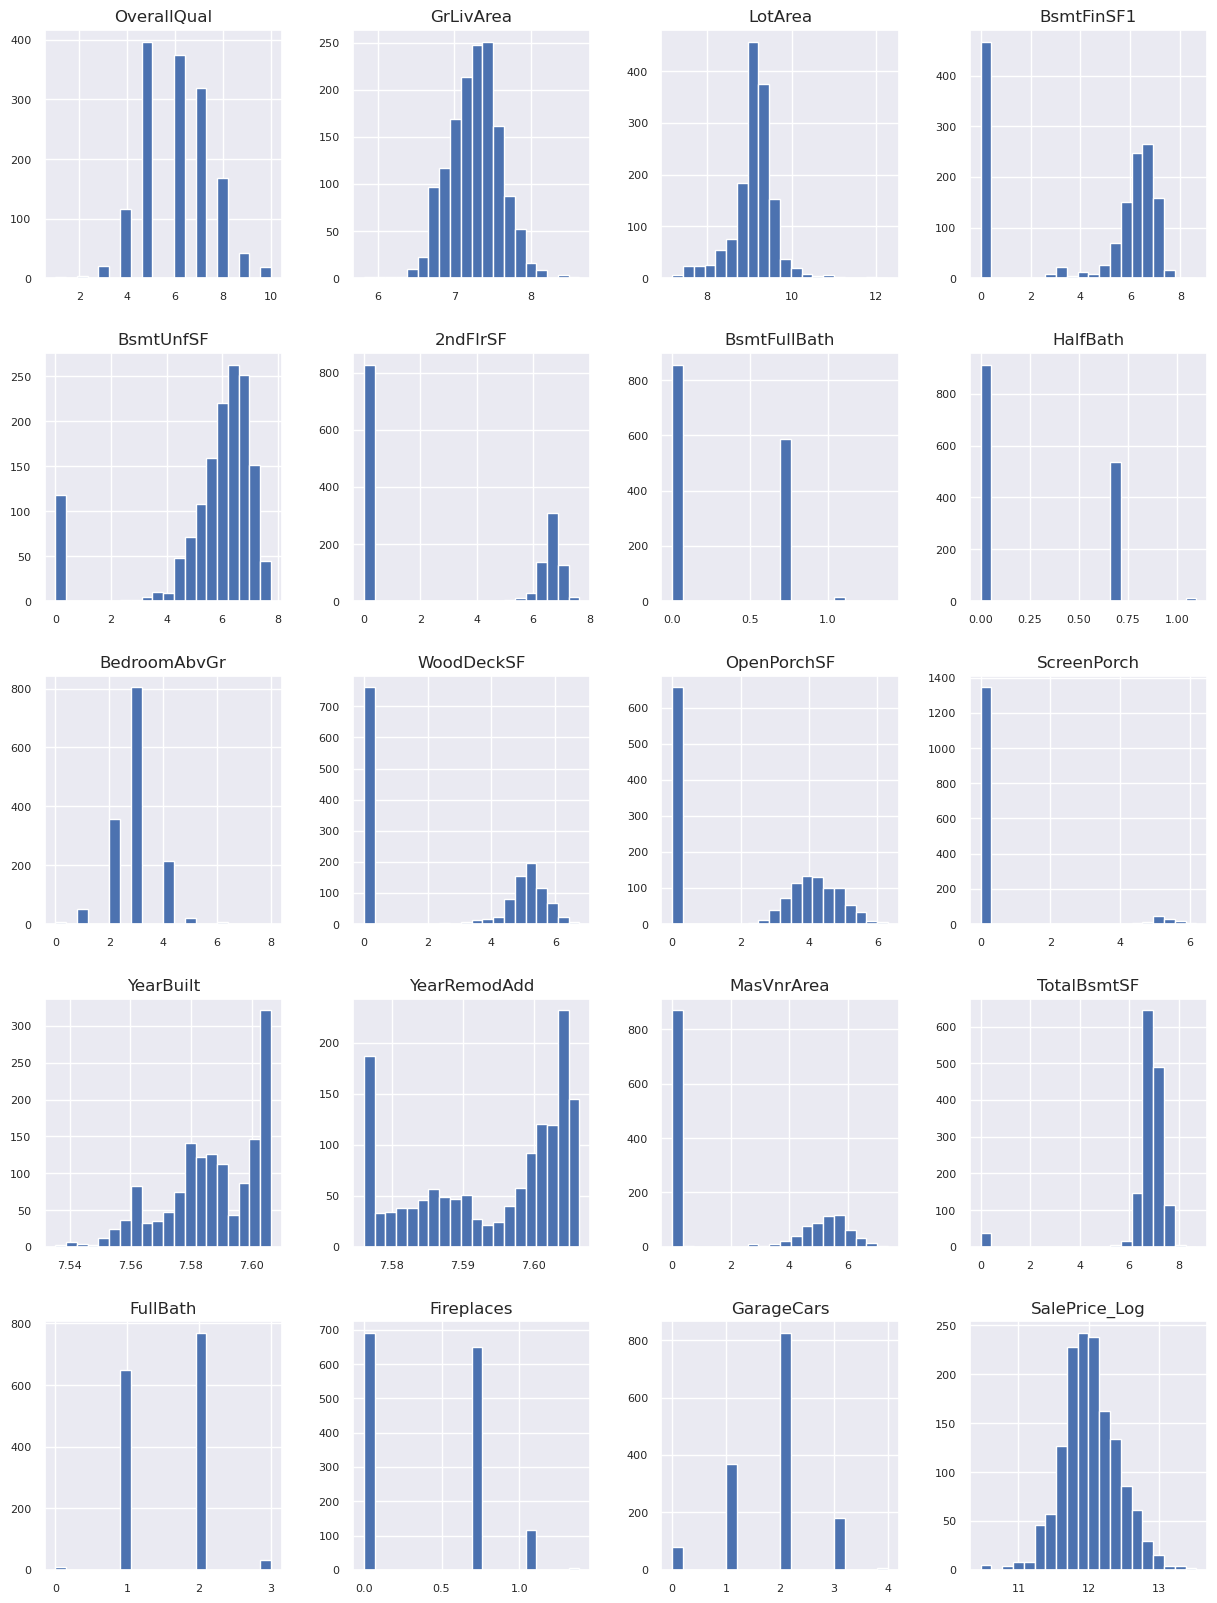

In [57]:
# Plotting the feature distribution after log transformation
df_train_logged.hist(figsize=(15, 20), bins=20,xlabelsize=8,\
                  ylabelsize=8)

plt.show()

### Plotting Feature Distribution After Log Transformation

This code is plotting the histograms of the numeric features in the preprocessed training dataset after performing a log transformation on the features. The purpose of this is to check whether the log transformation has improved the distribution of the features and made them more normally distributed, which is desirable for some machine learning algorithms.

Log transformation is a commonly used technique in data analysis to deal with skewed data distributions. It can help to normalize the data and make it more symmetric, which can be beneficial for certain types of analyses and modeling. In the context of this code snippet, it appears that the data has been transformed using a logarithmic scale, and the resulting distribution of the transformed features is being visualized using histograms. By examining the distribution of the transformed features, one can gain insights into the shape of the data and identify any potential issues or anomalies that may need to be addressed before proceeding with further analysis or modeling.

In [58]:
# Again, get a glimpse of the skeweness of each numerical feature


skewness = df_train_logged.select_dtypes(include=['float', 'int']).apply(lambda x: skew(x.dropna()))
skewness = skewness.sort_values(ascending=False)
for feature, skew_value in zip(skewness.index, skewness.values):
    print(f"{feature}: {skew_value:.2f}")

ScreenPorch: 3.15
HalfBath: 0.57
MasVnrArea: 0.50
BsmtFullBath: 0.42
2ndFlrSF: 0.29
OverallQual: 0.22
BedroomAbvGr: 0.21
Fireplaces: 0.18
WoodDeckSF: 0.15
SalePrice_Log: 0.12
FullBath: 0.04
GrLivArea: -0.01
OpenPorchSF: -0.02
LotArea: -0.14
GarageCars: -0.34
YearRemodAdd: -0.51
BsmtFinSF1: -0.62
YearBuilt: -0.64
BsmtUnfSF: -2.18
TotalBsmtSF: -5.15


**Merge both numerical and categorical features into one dataframe**

In [59]:
# Merging both dataframes
df_train_merge = pd.concat([df_train_logged, df_train_dumm], axis = 1)
df_test_merge = pd.concat([df_test_logged, df_test_dumm], axis = 1)

print(f'Train dataset shape: {df_train_merge.shape}')
print(f'Test dataset shape: {df_test_merge.shape}')

Train dataset shape: (1460, 171)
Test dataset shape: (1459, 170)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Model Development

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

##  Data Preparation before Modelling

**Seperating the target feature in Train data**

In [60]:
# Store the predictors in X and target feature in y
X = df_train_merge[[x for x in df_train_merge.columns if x != 'SalePrice_Log']]
y = df_train_merge['SalePrice_Log']

# Get the shape of X and y
print(X.shape, y.shape)

(1460, 170) (1460,)


**Standrdizing the data**

Standardization process is used to equalize the scale of the data so that all the features fall within the same range.

Standardization is a transformation in which the mean is subtracted from each feature value and divided by the standard deviation, so that the mean is 0 and the standard deviation is 1. This may improve the predictive performance of the model since all features are on the same scale.

In [61]:
# importing the necessary library
from sklearn.preprocessing import StandardScaler

# Standardizing data
std_scaler = StandardScaler().fit(X)
X_transform = std_scaler.transform(X)

# Applying standardization on the testing set
df_test_transform = std_scaler.transform(df_test_merge)

In [62]:
# Changing the resulted arrays of the above operations to dataframes
X_transform = pd.DataFrame(X_transform, columns=X.columns)
df_test_transform = pd.DataFrame(df_test_transform, columns = df_test_merge.columns)

y = pd.DataFrame(y).reset_index().drop('index', axis=1)

**Backward Stepwise Regression**

Stepwise regression is a method of determining which explanatory variables to use in turn when creating a regression model.

For example, if you have 10 explanatory variables, you can start with all of them and then remove them one by one to remove variables that are not statistically significant.

In backward stepwise regression, we reduce the number of variables to include in the model, thereby obtaining a simpler model.

In [63]:
# Importing library to apply OLS regression model
import statsmodels.api as sm

selected_features = []

def backward_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """ 
    Perform a backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X: predictors
            y: target
            initial_list: column names of X
            threshold_in: include a feature if its p-value < threshold_in
            threshold_out: exclude a feature if its p-value > threshold_out
            verbose: whether to print the sequence of inclusions and exclusions
        
        Returns: list of selected features
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {} with p-value {}:'.format(worst_feature, worst_pval))
        if not changed:
            break
    selected_features.append(included)
    print(f'\nSelected Features:\n{selected_features[0]}')

backward_selection(X_transform, y)

Drop Exterior1st_HdBoard with p-value 0.997975270050775:
Drop Neighborhood_CollgCr with p-value 0.9801412646970042:
Drop 2ndFlrSF with p-value 0.9745968629397777:
Drop Exterior1st_CBlock with p-value 0.9692430598742945:
Drop BsmtExposure_Av with p-value 0.9619885004871206:
Drop Neighborhood_Blueste with p-value 0.9541620125552783:
Drop Exterior1st_WdShing with p-value 0.9494376730108366:
Drop Exterior1st_AsphShn with p-value 0.9446613817209485:
Drop HouseStyle_SLvl with p-value 0.9398677401402629:
Drop SaleType_CWD with p-value 0.9349269470938792:
Drop KitchenQual_Gd with p-value 0.9203125294456311:
Drop Neighborhood_SawyerW with p-value 0.9161087375974362:
Drop Condition1_PosA with p-value 0.9123618757461928:
Drop Condition1_RRAn with p-value 0.9704023919424363:
Drop Condition1_RRNe with p-value 0.8932491928661248:
Drop SaleType_Con with p-value 0.889386418160589:
Drop BsmtFinType1_ALQ with p-value 0.8838134923586567:
Drop BsmtFinType2_Unf with p-value 0.8833409004945459:
Drop BsmtFin

In [64]:
# Now using only the slected features in our training and testing sets
X_transform = X_transform[selected_features[0]]
df_test_transform = df_test_transform[selected_features[0]]

In [65]:
# Check the data
X_transform

,OverallQual,GrLivArea,LotArea,BsmtFinSF1,BsmtFullBath,WoodDeckSF,ScreenPorch,YearBuilt,YearRemodAdd,TotalBsmtSF,Fireplaces,GarageCars,MSZoning_C (all),LotShape_IR3,LotConfig_CulDSac,LotConfig_FR2,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Condition1_Norm,Condition1_RRAe,BldgType_1Fam,HouseStyle_2Story,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_MetalSd,MasVnrType_BrkCmn,ExterCond_Ex,ExterCond_Fa,ExterCond_Po,Foundation_BrkTil,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_LwQ,BsmtFinType2_ALQ,HeatingQC_Ex,HeatingQC_Gd,KitchenQual_Ex,GarageType_2Types,SaleType_ConLD,SaleType_New,SaleCondition_AdjLand,SaleCondition_Normal
0,0.651479,0.529194,-0.133270,0.779431,1.148788,-0.946701,-0.292769,1.045180,0.877541,0.002513,-1.013562,0.311725,-0.083045,-0.083045,-0.262324,-0.182380,-0.203395,-0.190252,-0.271163,-0.186352,-0.078757,-0.169981,-0.235958,-0.289638,-0.250182,-0.131991,0.39841,-0.087129,0.443533,1.510265,-0.037037,-0.188311,-0.421212,-0.101885,-0.045376,-0.139832,-0.02618,-0.333333,-0.064238,-0.045376,-0.300609,-0.317893,0.687938,-0.231065,-0.114827,0.985043,-0.444638,-0.271163,-0.064238,-0.078757,-0.301962,-0.052414,0.467651
1,-0.071836,-0.381965,0.113413,0.888257,-0.833225,1.249540,-0.292769,0.163445,-0.424186,0.341114,0.743356,0.311725,-0.083045,-0.083045,-0.262324,5.483049,-0.203395,-0.190252,-0.271163,-0.186352,-0.078757,-0.169981,-0.235958,-0.289638,-0.250182,-0.131991,-2.50998,-0.087129,0.443533,-0.662136,-0.037037,-0.188311,2.374103,-0.101885,-0.045376,-0.139832,-0.02618,-0.333333,-0.064238,-0.045376,-0.300609,3.145715,-1.453618,-0.231065,-0.114827,0.985043,-0.444638,-0.271163,-0.064238,-0.078757,-0.301962,-0.052414,0.467651
2,0.651479,0.659631,0.420049,0.654803,1.148788,-0.946701,-0.292769,0.980275,0.829642,0.065397,0.743356,0.311725,-0.083045,-0.083045,-0.262324,-0.182380,-0.203395,-0.190252,-0.271163,-0.186352,-0.078757,-0.169981,-0.235958,-0.289638,-0.250182,-0.131991,0.39841,-0.087129,0.443533,1.510265,-0.037037,-0.188311,-0.421212,-0.101885,-0.045376,-0.139832,-0.02618,-0.333333,-0.064238,-0.045376,-0.300609,-0.317893,-1.453618,-0.231065,-0.114827,0.985043,-0.444638,-0.271163,-0.064238,-0.078757,-0.301962,-0.052414,0.467651
3,0.651479,0.541448,0.103317,0.384539,1.148788,-0.946701,-0.292769,-1.873790,-0.715872,-0.105819,0.743356,1.650307,-0.083045,-0.083045,-0.262324,-0.182380,-0.203395,5.256182,-0.271163,-0.186352,-0.078757,-0.169981,-0.235958,-0.289638,-0.250182,-0.131991,0.39841,-0.087129,0.443533,1.510265,-0.037037,-0.188311,-0.421212,-0.101885,-0.045376,-0.139832,-0.02618,3.000000,-0.064238,-0.045376,-0.300609,-0.317893,0.687938,-0.231065,-0.114827,-1.015184,2.249020,-0.271163,-0.064238,-0.078757,-0.301962,-0.052414,-2.138345
4,1.374795,1.282295,0.878431,0.754400,1.148788,1.080884,-0.292769,0.947798,0.733773,0.256237,0.743356,1.650307,-0.083045,-0.083045,-0.262324,5.483049,-0.203395,-0.190252,-0.271163,-0.186352,-0.078757,5.883006,-0.235958,-0.289638,-0.250182,-0.131991,0.39841,-0.087129,0.443533,1.510265,-0.037037,-0.188311,-0.421212,-0.101885,-0.045376,-0.139832,-0.02618,-0.333333,-0.064238,-0.045376,-0.300609,-0.317893,-1.453618,-0.231065,-0.114827,0.985043,-0.444638,-0.271163,-0.064238,-0.078757,-0.301962,-0.052414,0.467651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.416598,-0.259231,-1.414140,-0.833225,-0.946701,-0.292769,0.915305,0.733773,0.096134,0.743356,0.311725,-0.083045,-0.083045,-0.262324,-0.182380,-0.203395,-0.190252,-0.271163,-0.186352,-0.078757,-0.169981,-0.235958,-0.289638,-0.250182,-0.131991,0.39841,-0.087129,0.443533,1.510265,-0.037037,-0.188311,-0.421212,-0.101885,-0.045376,-0.139832,-0.026

In [66]:
# Check the data
df_test_transform

,OverallQual,GrLivArea,LotArea,BsmtFinSF1,BsmtFullBath,WoodDeckSF,ScreenPorch,YearBuilt,YearRemodAdd,TotalBsmtSF,Fireplaces,GarageCars,MSZoning_C (all),LotShape_IR3,LotConfig_CulDSac,LotConfig_FR2,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Condition1_Norm,Condition1_RRAe,BldgType_1Fam,HouseStyle_2Story,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_MetalSd,MasVnrType_BrkCmn,ExterCond_Ex,ExterCond_Fa,ExterCond_Po,Foundation_BrkTil,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_LwQ,BsmtFinType2_ALQ,HeatingQC_Ex,HeatingQC_Gd,KitchenQual_Ex,GarageType_2Types,SaleType_ConLD,SaleType_New,SaleCondition_AdjLand,SaleCondition_Normal
0,-0.795151,-1.408978,0.482944,0.642211,-0.833225,0.959934,3.126170,-0.331626,-1.155070,0.028608,-1.013562,-1.026858,-0.083045,-0.083045,-0.262324,-0.18238,-0.203395,-0.190252,-0.271163,-0.186352,-0.078757,-0.169981,-0.235958,-0.289638,-0.250182,-0.131991,-2.50998,-0.087129,0.443533,-0.662136,-0.037037,-0.188311,-0.421212,-0.101885,-0.045376,-0.139832,-0.02618,-0.333333,-0.064238,-0.045376,-0.300609,-0.317893,0.687938,-0.231065,-0.114827,-1.015184,-0.444638,-0.271163,-0.064238,-0.078757,-0.301962,-0.052414,0.467651
1,-0.071836,-0.226831,0.879380,0.868926,-0.833225,1.355840,-0.292769,-0.431095,-1.301918,0.386245,-1.013562,-1.026858,-0.083045,-0.083045,-0.262324,-0.18238,-0.203395,-0.190252,-0.271163,-0.186352,-0.078757,-0.169981,-0.235958,-0.289638,-0.250182,-0.131991,0.39841,-0.087129,0.443533,-0.662136,-0.037037,-0.188311,-0.421212,-0.101885,-0.045376,-0.139832,-0.02618,-0.333333,-0.064238,-0.045376,-0.300609,-0.317893,0.687938,-0.231065,-0.114827,-1.015184,-0.444638,-0.271163,-0.064238,-0.078757,-0.301962,-0.052414,0.467651
2,-0.795151,0.383637,0.819235,0.817388,-0.833225,1.118873,-0.292769,0.850270,0.637809,0.072948,0.743356,0.311725,-0.083045,-0.083045,-0.262324,-0.18238,-0.203395,-0.190252,-0.271163,-0.186352,-0.078757,-0.169981,-0.235958,-0.289638,-0.250182,-0.131991,0.39841,-0.087129,0.443533,1.510265,-0.037037,-0.188311,-0.421212,-0.101885,-0.045376,-0.139832,-0.02618,-0.333333,-0.064238,-0.045376,-0.300609,-0.317893,0.687938,-0.231065,-0.114827,-1.015184,2.249020,-0.271163,-0.064238,-0.078757,-0.301962,-0.052414,0.467651
3,-0.071836,0.337248,0.188077,0.726234,-0.833225,1.322139,-0.292769,0.882796,0.637809,0.071066,0.743356,0.311725,-0.083045,-0.083045,-0.262324,-0.18238,-0.203395,-0.190252,-0.271163,-0.186352,-0.078757,-0.169981,-0.235958,-0.289638,-0.250182,-0.131991,0.39841,-0.087129,0.443533,1.510265,-0.037037,-0.188311,-0.421212,-0.101885,-0.045376,-0.139832,-0.02618,-0.333333,-0.064238,-0.045376,-0.300609,-0.317893,0.687938,-0.231065,-0.114827,0.985043,-0.444638,-0.271163,-0.064238,-0.078757,-0.301962,-0.052414,0.467651
4,1.374795,-0.339494,-1.145753,0.450086,-0.833225,-0.946701,3.255165,0.687397,0.349337,0.353470,-1.013562,0.311725,-0.083045,-0.083045,-0.262324,-0.18238,-0.203395,-0.190252,-0.271163,-0.186352,-0.078757,-0.169981,-0.235958,-0.289638,-0.250182,7.576279,0.39841,-0.087129,-2.254625,-0.662136,-0.037037,-0.188311,-0.421212,-0.101885,-0.045376,-0.139832,-0.02618,-0.333333,-0.064238,-0.045376,-0.300609,-0.317893,0.687938,-0.231065,-0.114827,0.985043,-0.444638,-0.271163,-0.064238,-0.078757,-0.301962,-0.052414,0.467651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.518467,-0.815844,-2.981622,-1.414140,-0.833225,-0.946701,-0.292769,-0.034131,-0.715872,-0.389508,-1.013562,-2.365440,-0.083045,-0.083045,-0.262324,-0.18238,-0.203395,-0.190252,-0.271163,-0.186352,-0.078757,-0.169981,-0.235958,-0.289638,-0.250182,-0.131991,0.39841,-0.087129,-2.254625,1.510265,-0.037037,-0.188311,-0.421212,-0.101885,-0.045376

**Variance Inflation Factor (VIF)**

Variance Inflation Factor (VIF) is a way to quantify the strength of the relationship between features; a high VIF value means that a feature is likely to be strongly correlated with other features, which can cause confusion when building predictive models.

For example, the size of a given house and the number of rooms may be highly correlated. Including both of these feature values in the model makes it difficult to determine which feature values are important to the model; if the VIF value is high, it is recommended that these highly correlated feature values be removed from the model. In general, features with VIF values greater than 10 are considered highly multicollinear and are often removed from the model.

In [67]:
# Importing library for VIF measurement process
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Calculate VIF Factor and sort in descending order
vif = pd.DataFrame()
vif['Feature'] = X_transform.columns
vif['VIF Factor'] = [variance_inflation_factor(X_transform.values,i) for i in range(X_transform.shape[1])]
vif = vif.sort_values(by='VIF Factor', ascending=False).reset_index(drop=True)
print(vif)

                  Feature  VIF Factor
0               YearBuilt    4.788855
1             OverallQual    3.711357
2               GrLivArea    3.030293
3            SaleType_New    2.335359
4                 LotArea    2.181364
5              GarageCars    2.158909
6            YearRemodAdd    2.148320
7            HeatingQC_Ex    2.047443
8              BsmtFinSF1    1.912015
9    SaleCondition_Normal    1.908533
10            BsmtQual_Ex    1.841828
11      Foundation_BrkTil    1.798870
12           BsmtFullBath    1.791038
13   Neighborhood_OldTown    1.757948
14          BldgType_1Fam    1.642832
15      HouseStyle_2Story    1.607897
16   Neighborhood_NridgHt    1.607659
17             Fireplaces    1.599159
18         KitchenQual_Ex    1.598835
19        BsmtExposure_No    1.528482
20        BsmtExposure_Gd    1.419489
21           HeatingQC_Gd    1.384771
22   Neighborhood_Somerst    1.364009
23   Neighborhood_BrkSide    1.363233
24            TotalBsmtSF    1.349490
25          

**Observation**

Since the VIF values of both features are less than 10 and the effect of multicollinearity is considered small, we conclude that there is no need to remove them.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Splitting the dataset into training and testing sets

Splitting a dataset into a training set and a testing set is to evaluate the performance of a machine learning model. The model is trained on the training set, and the trained model's performance is evaluated using the testing set. If the model overfits the training data, its performance on the testing data may be lower, reducing the reliability of its predictions. By using both the training and testing sets, the overfitting of the model can be avoided, and its generalization performance can be evaluated. Moreover, by appropriately dividing the data into the training and testing sets before constructing the model, the performance of the model on unknown data can be evaluated.

In [68]:
# Importing the necessary library
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testin set
X_train, X_test, y_train, y_test = train_test_split(X_transform, y,\
                                                    test_size=0.2,\
                                                    shuffle=True,
                                                    random_state=1)

In [69]:
# Check data after splitting
print("Training set shape:", X_train.shape)
print("Training set target variable shape:", y_train.shape)
print("Testing set shape:", X_test.shape)
print("Testing set target variable shape:", y_test.shape)

Training set shape: (1168, 53)
Training set target variable shape: (1168, 1)
Testing set shape: (292, 53)
Testing set target variable shape: (292, 1)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Model Building

## Linear Regression

First, we will use linear regression, which is simple and easy to understand.


In [70]:
# Importing model evauluation metrics
from sklearn.metrics import mean_squared_error,r2_score

In [102]:
def model_performance(model, test, pred):
    """ 
    Measuring each model RMSE and R-Squared 
        Arguments:
            model: The model that we aim to evaluate its performance
            y_test: test_data
            y_pred: predicted_data from the model
        
        Returns:
            print algorithm name
            print RMSE
            Print R-Squared     
    """
    RMSE = np.sqrt(mean_squared_error(test, pred))    
    R_Squared = r2_score(test, pred)
    
    
    print(f'Algorithm: {model}\n')
    print(f'Root Mean Squared Error: {RMSE}\n')
    print(f'Coefficient of Determination: {R_Squared}')

In [72]:
# Importing linear regression library
from sklearn.linear_model import LinearRegression

# Initiating the linear model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_preds_lin = lin_model.predict(X_test)
model_performance("Linear Model", y_test, y_preds_lin)

Algorithm: Linear Model

Root Mean Squared Error: 0.12189624713294554

Coefficient of Determination: 0.9143865548660521


### Cross validation
To check if the R-squared and the RMSE are close to the original result without cross validation.

Cross-validation allows the user to adjust the ratio of training data to test data to avoid over-training and to evaluate the generalization performance of the model. Results obtained through cross-validation are more reliable than those obtained using a single test set, thus providing a more accurate assessment of model performance.

In [73]:
# Importing the cross validation library
from sklearn.model_selection import cross_val_score

# Applying cross validation on the dataset
model_lin_r2_cross = cross_val_score(lin_model, X_transform, y, scoring = 'r2')
model_lin_rmse_cross = cross_val_score(lin_model, X_transform, y, scoring = 'neg_root_mean_squared_error')
print(f'R_Squared using cross validation: {np.mean(model_lin_r2_cross)}')
print(f'RMSE using cross validation: {-1 * (np.mean(model_lin_rmse_cross))}')

R_Squared using cross validation: -1.0278697233783968e+25
RMSE using cross validation: 554232109812.6887


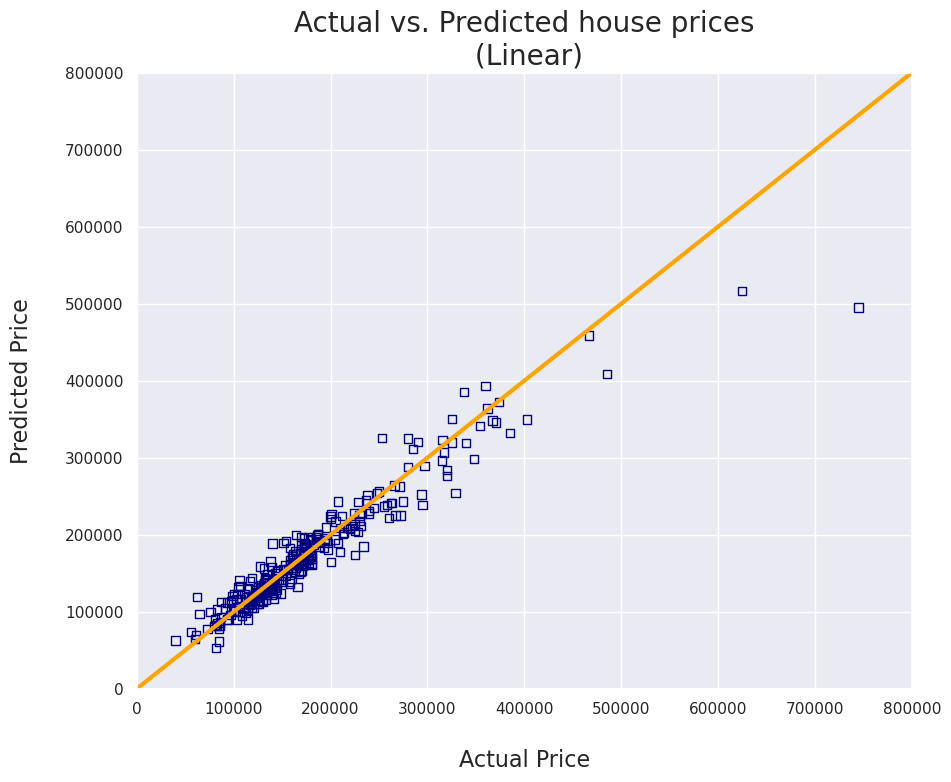

In [74]:
# Plotting the relationship between actual and perdicted prices for linear model
plt.figure(figsize=(10,8))
plt.scatter(np.exp(y_test), np.exp(y_preds_lin),
            color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (Linear)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [75]:
# Empty lists to store the results of the linear model in lists
algorithms = []
R_squared = []
RMSE = []

# Adding the results of the linear model
algorithms.append(lin_model.__class__.__name__)
R_squared.append(round(r2_score(y_test, y_preds_lin),4))
RMSE.append(round(np.sqrt(mean_squared_error(y_test, y_preds_lin)),4))

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Lasso Regression

Lasso Regression is a type of linear regression model that enables feature selection by setting the weights of unnecessary features to zero.

By L1 regularization, coefficients of unimportant features can be set to zero, preventing overfitting. Additionally, Lasso Regression outputs sparse solutions, improving model interpretability.

Since Lasso Regression cannot express nonlinear relationships, it is only applicable to data assumed to be linear. Additionally, if the number of features is larger than the number of samples, Lasso Regression may not be able to solve the problem.

In [76]:
# Importing Lasso regression library
from sklearn.linear_model import Lasso

# Initiaiting lasso regression model
lass_model = Lasso(alpha=0.001)
lass_model.fit(X_train, y_train)
y_preds_lass = lass_model.predict(X_test)
model_performance("Lasso Model", y_test, y_preds_lass)

Algorithm: Lasso Model

Root Mean Squared Error: 0.12215984205224992

Coefficient of Determination: 0.9140158843979522


In [77]:
# Applying cross validation on the dataset
model_lass_r2_cross = cross_val_score(lass_model, X_transform, y, scoring = 'r2')
model_lass_rmse_cross = cross_val_score(lass_model, X_transform, y, scoring = 'neg_root_mean_squared_error')
print(f'R_Squared using cross validation: {np.mean(model_lass_r2_cross)}')
print(f'RMSE using cross validation: {-1 * (np.mean(model_lass_rmse_cross))}')

R_Squared using cross validation: 0.8991914628250559
RMSE using cross validation: 0.12606261835970983


## Lasso Regression -Hyperparameter Tuning-

This code performs a grid search using GridSearchCV to find the optimal hyperparameters for Lasso regression. It generates 50 different alpha values using np.logspace(). It then uses GridSearchCV to perform cross-validation to find the optimal alpha value among these alpha values. The scoring parameter is set to r2.

It displays the optimal alpha value and the corresponding coefficient of determination. By adjusting the hyperparameters of the Lasso regression, it is possible to improve the model's performance.

In [78]:
# Importing GridSearchCV library
from sklearn.model_selection import GridSearchCV

# Tuning the lasso model
# Choosing from different values of alphas
alphas = list(np.logspace(-5, 1, 50))
params = {'alpha': alphas}
lass_grid = GridSearchCV(Lasso(), params, scoring='r2', verbose=1)

lass_grid.fit(X_train, y_train)

print(f'R-Squared for the optimized model: {lass_grid.best_score_}')
print(f'Best alpha for the optimized model: {lass_grid.best_params_}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
R-Squared for the optimized model: 0.8949065952110692
Best alpha for the optimized model: {'alpha': 0.0006866488450042998}


In [79]:
# Building optimized Lasso Model
lass_model_tune = Lasso(alpha = lass_grid.best_params_['alpha'])
lass_model_tune.fit(X_train, y_train)
y_preds_lass_tune = lass_model_tune.predict(X_test)
model_performance("Lasso Model Optimized", y_test, y_preds_lass_tune)

Algorithm: Lasso Model Optimized

Root Mean Squared Error: 0.1220315322734818

Coefficient of Determination: 0.914196415227964


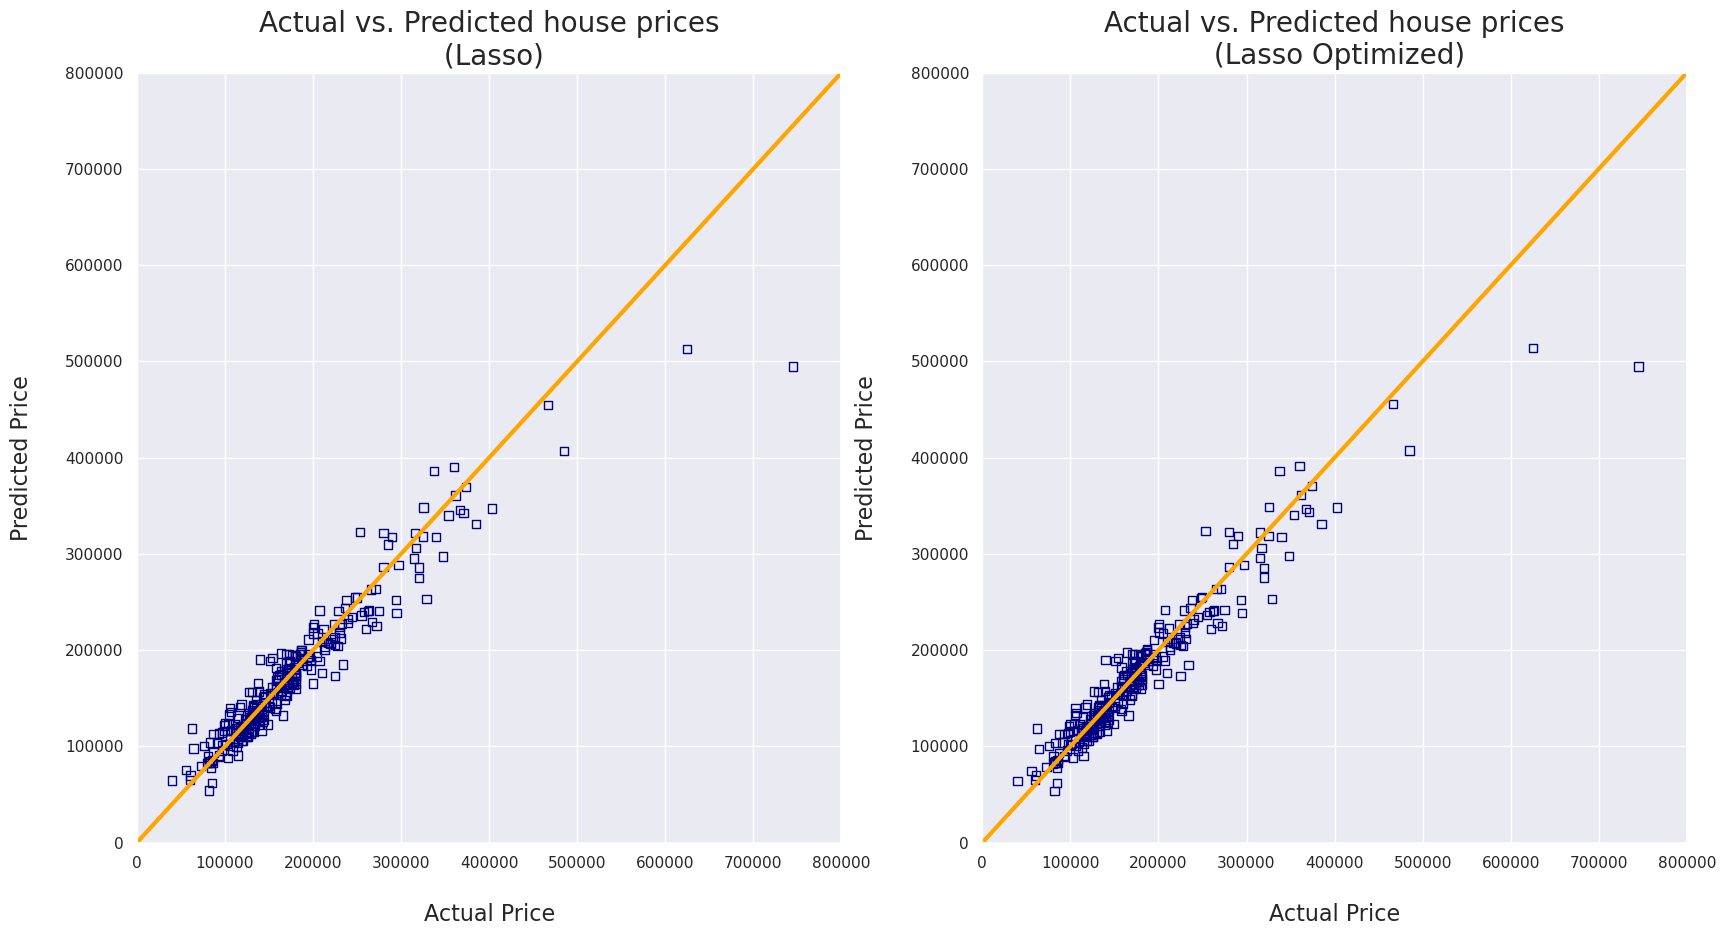

In [80]:
plt.figure(figsize=(20, 10))
# Before Optimization
plt.subplot(1,2,1)
plt.scatter(np.exp(y_test), np.exp(y_preds_lass),
            color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (Lasso)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)

# After Optimization
plt.subplot(1,2,2)

plt.scatter(np.exp(y_test), np.exp(y_preds_lass_tune),
            color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (Lasso Optimized)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)

plt.show()

### Lasso Regression Visualization

This is the output of a machine learning model that uses Ridge Regression to predict the sale price of houses.

The model has been optimized using cross-validation, with 5 folds, and 50 different values of the regularization parameter alpha have been tested. The best alpha has been determined to be 0.00016768329368110083, and the corresponding R-Squared value for the optimized model is 0.8963713147176036.

This means that the optimized model explains 89.63% of the variance in the sale price of houses.

The goal is to find the best alpha value that maximizes the R-squared score.

R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (SalePrice) that is predictable from the independent variables (features). The closer the R-squared score is to 1, the better the model fits the data.

The best alpha value is the one that results in the highest R-squared score. The message tells us that the optimized model achieved an R-squared score of 0.8963 and that the best alpha value was 0.00016768329368110083.

This information is important because it gives insight into the performance of the model and helps to determine whether it is accurate and reliable in predicting the SalePrice.

In [81]:
# Adding the results of the lasso model
algorithms.append(lass_model_tune.__class__.__name__)
R_squared.append(round(r2_score(y_test, y_preds_lass_tune),4))
RMSE.append(round(np.sqrt(mean_squared_error(y_test, y_preds_lass_tune)),4))

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Ridge Regression

In Ridge regression, the regression coefficients are constrained using L2 regularization, whereas in Lasso regression, L1 regularization is used to constrain the regression coefficients. This means that Ridge and Lasso regression impose different constraints due to the different types of penalties, which can lead to different model performance.

In [82]:
# Importing Ridge regression library
from sklearn.linear_model import Ridge
# Initiaiting lasso regression model
ridge_model = Ridge(alpha=0.001)
ridge_model.fit(X_train, y_train)
y_preds_ridge = ridge_model.predict(X_test)
model_performance("Ridge Model", y_test, y_preds_ridge)

Algorithm: Ridge Model

Root Mean Squared Error: 0.121896245985154

Coefficient of Determination: 0.9143865564783477


## Ridge Regression -Hyperparameter Tuning-

In [83]:
# Tuning the ridge model
# Choosing from different values of alphas
alphas = list(np.logspace(-5, 1, 50))
params = {'alpha': alphas}
ridge_grid = GridSearchCV(Ridge(), params, scoring='r2', verbose=1)

ridge_grid.fit(X_train, y_train)

print(f'R-Squared for the optimized model: {ridge_grid.best_score_}')
print(f'Best alpha for the optimized model: {ridge_grid.best_params_}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
R-Squared for the optimized model: 0.8948783345007175
Best alpha for the optimized model: {'alpha': 10.0}


In [84]:
# Building optimized Ridge Model
ridge_model_tune = Ridge(alpha = ridge_grid.best_params_['alpha'])
ridge_model_tune.fit(X_train, y_train)
y_preds_ridge_tune = ridge_model_tune.predict(X_test)
model_performance("Ridge Model Optimized", y_test, y_preds_ridge_tune)

Algorithm: Ridge Model Optimized

Root Mean Squared Error: 0.12190190351843519

Coefficient of Determination: 0.9143786091926479


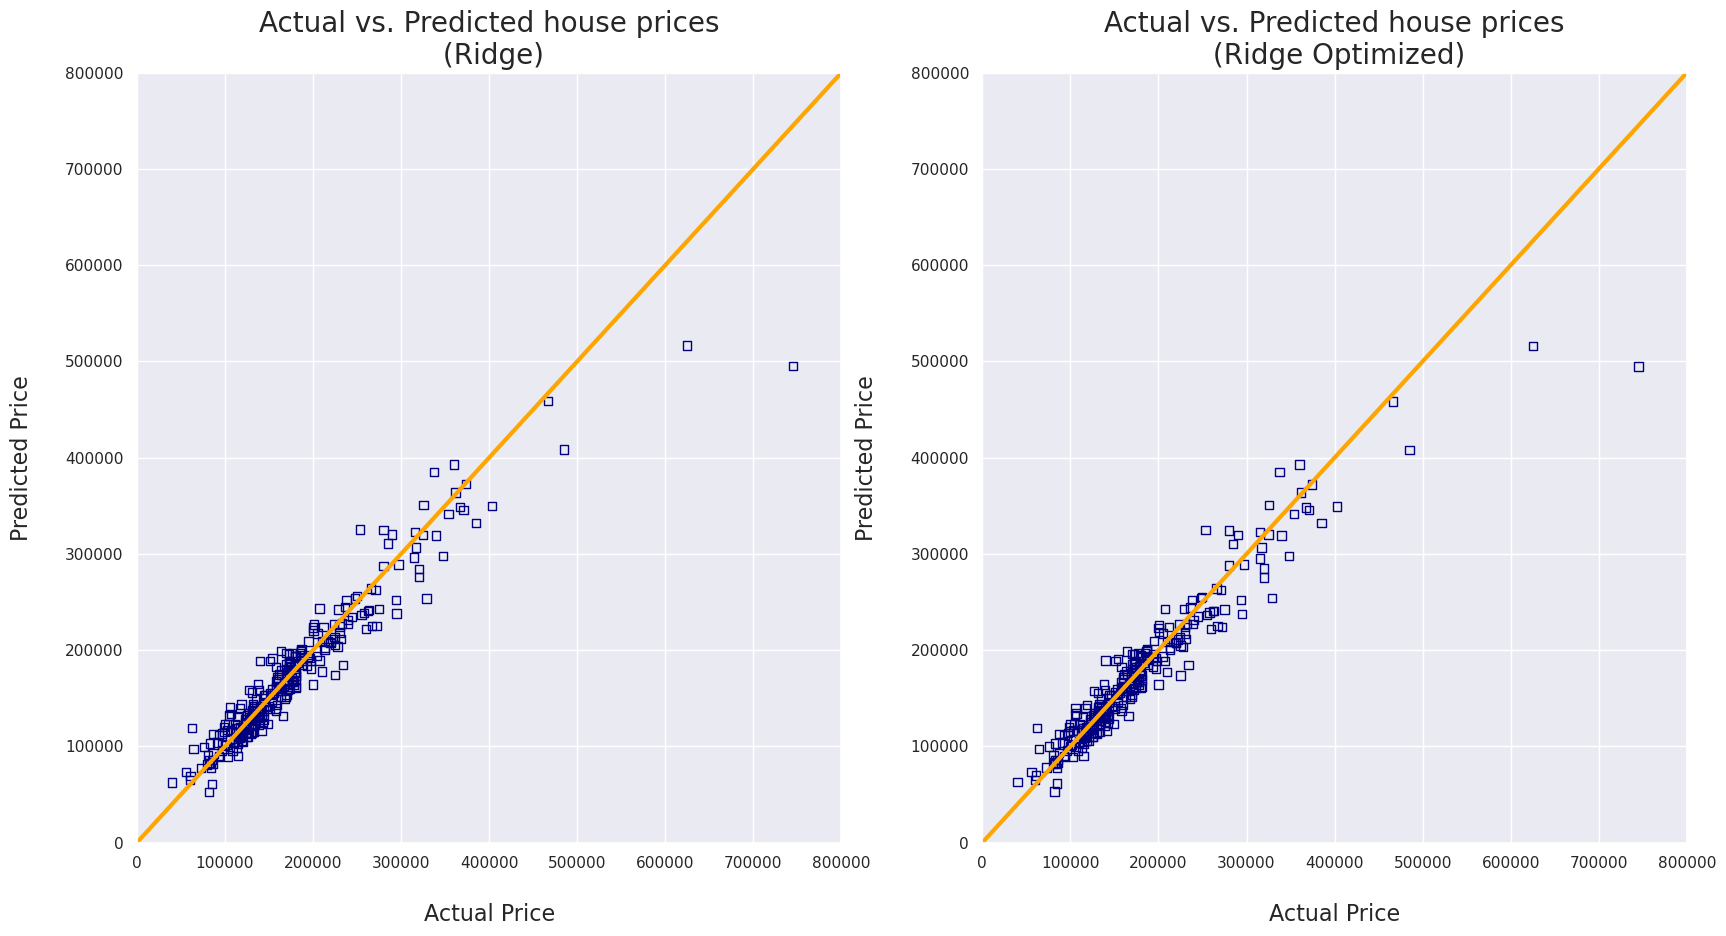

In [85]:
plt.figure(figsize=(20, 10))
# Before Optimization
plt.subplot(1,2,1)

plt.scatter(np.exp(y_test), np.exp(y_preds_ridge),
            color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (Ridge)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)

# After Optimization
plt.subplot(1,2,2)

plt.scatter(np.exp(y_test), np.exp(y_preds_ridge_tune),
            color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (Ridge Optimized)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)

plt.show()

### Ridge Model Visualization

The Ridge model is a linear regression model that uses L2 regularization to prevent overfitting. The Root Mean Squared Error (RMSE) is a measure of the difference between the predicted values and the actual values. The lower the RMSE, the better the model's performance. In this case, the RMSE is 0.1235, which indicates that the model's predictions are relatively close to the actual values.

The Coefficient of Determination, also known as R-squared, is a measure of how well the regression model fits the observed data. It ranges from 0 to 1, with a higher value indicating a better fit. In this case, the R-squared value is 0.9121, which suggests that the Ridge model explains 91.21% of the variation in the target variable. It is also a measure of how well the model fits the data, and a higher R-squared indicates a better fit. These metrics can be used to evaluate the performance of the Ridge Model and to compare it to other models to determine which model is best suited for the task at hand.

Overall, these results indicate that the Ridge model performs well in predicting the target variable based on the input features.

In [86]:
# Adding the results of the Ridge model
algorithms.append(ridge_model_tune.__class__.__name__)
R_squared.append(round(r2_score(y_test, y_preds_ridge_tune),4))
RMSE.append(round(np.sqrt(mean_squared_error(y_test, y_preds_ridge_tune)),4))

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Random Forest Regression

Random Forest Regression is a method that divides data into multiple decision trees and outputs the final prediction value by averaging the predictions of each tree.

The characteristics of Random Forest Regression are as follows:

- By using multiple decision trees for prediction, it has higher generalization ability and can avoid overfitting more than individual trees.
- Since decision trees are constructed randomly, it can maintain high prediction accuracy for different datasets.
- Since multiple decision trees are averaged, the overfitting and noise of individual trees are offset, and more stable predictions can be made.## Random Forest Regression

In [87]:
# Importing Ridge regression library
from sklearn.ensemble import RandomForestRegressor
# Initiaiting lasso regression model
rf_model = RandomForestRegressor(random_state=4)
rf_model.fit(X_train, y_train)
y_preds_rf = rf_model.predict(X_test)
model_performance("Random Forest Model", y_test, y_preds_rf)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Algorithm: Random Forest Model

Root Mean Squared Error: 0.14658478757628418

Coefficient of Determination: 0.8761947368531584


### Random Forest Regression -Hyperparameter Tuning-

In [88]:
# Tuning the Random Forest model
# Choosing from different values of estimators
n_est = [10, 50, 100, 200, 300]

params = {'n_estimators': n_est}
rf_grid = GridSearchCV(RandomForestRegressor(), params, scoring='r2', verbose=1)

rf_grid.fit(X_train, y_train)

print(f'R-Squared for the optimized model: {rf_grid.best_score_}')
print(f'Best number of estimators for the optimized model: {rf_grid.best_params_}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

R-Squared for the optimized model: 0.8643087824349708
Best number of estimators for the optimized model: {'n_estimators': 300}


In [89]:
# Building optimized Random Forest Model
rf_model_tune = RandomForestRegressor(n_estimators = rf_grid.best_params_['n_estimators'], random_state=4)
rf_model_tune.fit(X_train, y_train)
y_preds_rf_tune = rf_model_tune.predict(X_test)
model_performance("Random Forest Model Optimized", y_test, y_preds_rf_tune)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Algorithm: Random Forest Model Optimized

Root Mean Squared Error: 0.14515756000073549

Coefficient of Determination: 0.8785938680884271


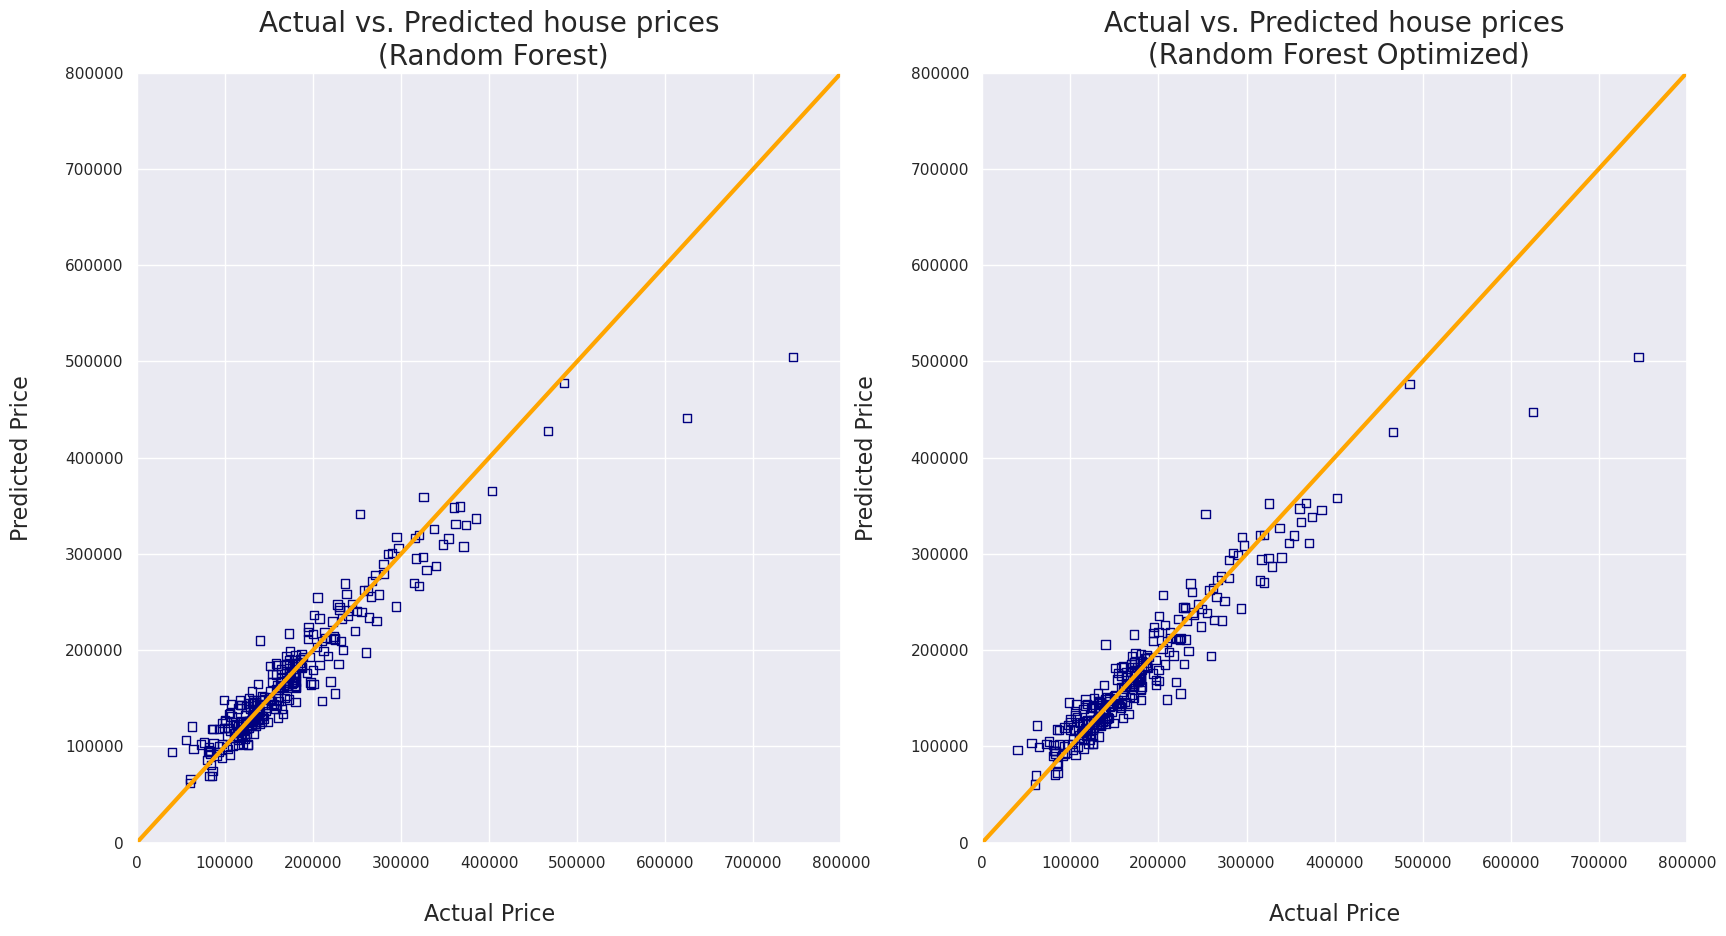

In [90]:
plt.figure(figsize=(20, 10))
# Before Optimization
plt.subplot(1,2,1)

plt.scatter(np.exp(y_test), np.exp(y_preds_rf),
            color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (Random Forest)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)

# After Optimization
plt.subplot(1,2,2)

plt.scatter(np.exp(y_test), np.exp(y_preds_rf_tune),
            color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (Random Forest Optimized)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)

plt.show()

### Random Forest Model Visualization

The Random Forest model is a type of ensemble model that combines multiple decision trees to improve the accuracy of the predictions. In this case, the model has a Root Mean Squared Error of 0.14662501997975105, which means that the average difference between the predicted and actual sale prices is about $14,662. This is slightly higher than the Ridge Model, which had an RMSE of 0.12351537384102909.

The Coefficient of Determination, also known as R-squared, is a measure of how well the model fits the data. The Random Forest Model has an R-squared of 0.8761267670872152, which indicates that the model explains about 87.6% of the variance in the data. This is a good value, but slightly lower than the Ridge Model's R-squared of 0.9120970727033124.

Overall, the Random Forest Model is a good option for predicting house sale prices, but the Ridge Model may be a slightly better fit for this particular dataset. However, it's always important to try out different models and compare their performance to find the best one for a specific task.

In [91]:
# Adding the results of the Random Forest model
algorithms.append(rf_model_tune.__class__.__name__)
R_squared.append(round(r2_score(y_test, y_preds_rf_tune),4))
RMSE.append(round(np.sqrt(mean_squared_error(y_test, y_preds_rf_tune)),4))

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## XGB Regression

In [92]:
# Importing Ridge regression library
from xgboost import XGBRegressor
# Initiaiting lasso regression model
xgb_model = XGBRegressor(random_state=4)
xgb_model.fit(X_train, y_train)
y_preds_xgb = xgb_model.predict(X_test)
model_performance("XGB Model", y_test, y_preds_xgb)

Algorithm: XGB Model

Root Mean Squared Error: 0.13568138149840364

Coefficient of Determination: 0.8939277411597515


### XGB Regression -Hyperparameter Tuning-

In [93]:
# Tuning the XGB model
# Choosing from different values of estimators
n_est = [100, 200, 500, 600]
# Choosing from different values of learning rates
learn_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]

colsample_bytree = [0.3, 0.5, 0.8]

params = {'n_estimators': n_est,
         'learning_rate': learn_rate,
         'colsample_bytree':colsample_bytree}
xgb_grid = GridSearchCV(XGBRegressor(), params, scoring='r2', verbose=1)

xgb_grid.fit(X_train, y_train)

print(f'R-Squared for the optimized model: {xgb_grid.best_score_}')
print(f'Best number of estimators and learning rate for the optimized model: {xgb_grid.best_params_}')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
R-Squared for the optimized model: 0.8951137358708486
Best number of estimators and learning rate for the optimized model: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'n_estimators': 200}


In [94]:
# Building optimized XGB Regression Model
xgb_model_tune = XGBRegressor(n_estimators = xgb_grid.best_params_['n_estimators'],\
                              learning_rate = xgb_grid.best_params_['learning_rate'], random_state=4)
xgb_model_tune.fit(X_train, y_train)
y_preds_xgb_tune = xgb_model_tune.predict(X_test)
model_performance("XGB Model Optimized", y_test, y_preds_xgb_tune)

Algorithm: XGB Model Optimized

Root Mean Squared Error: 0.1357102329350775

Coefficient of Determination: 0.893882625722369


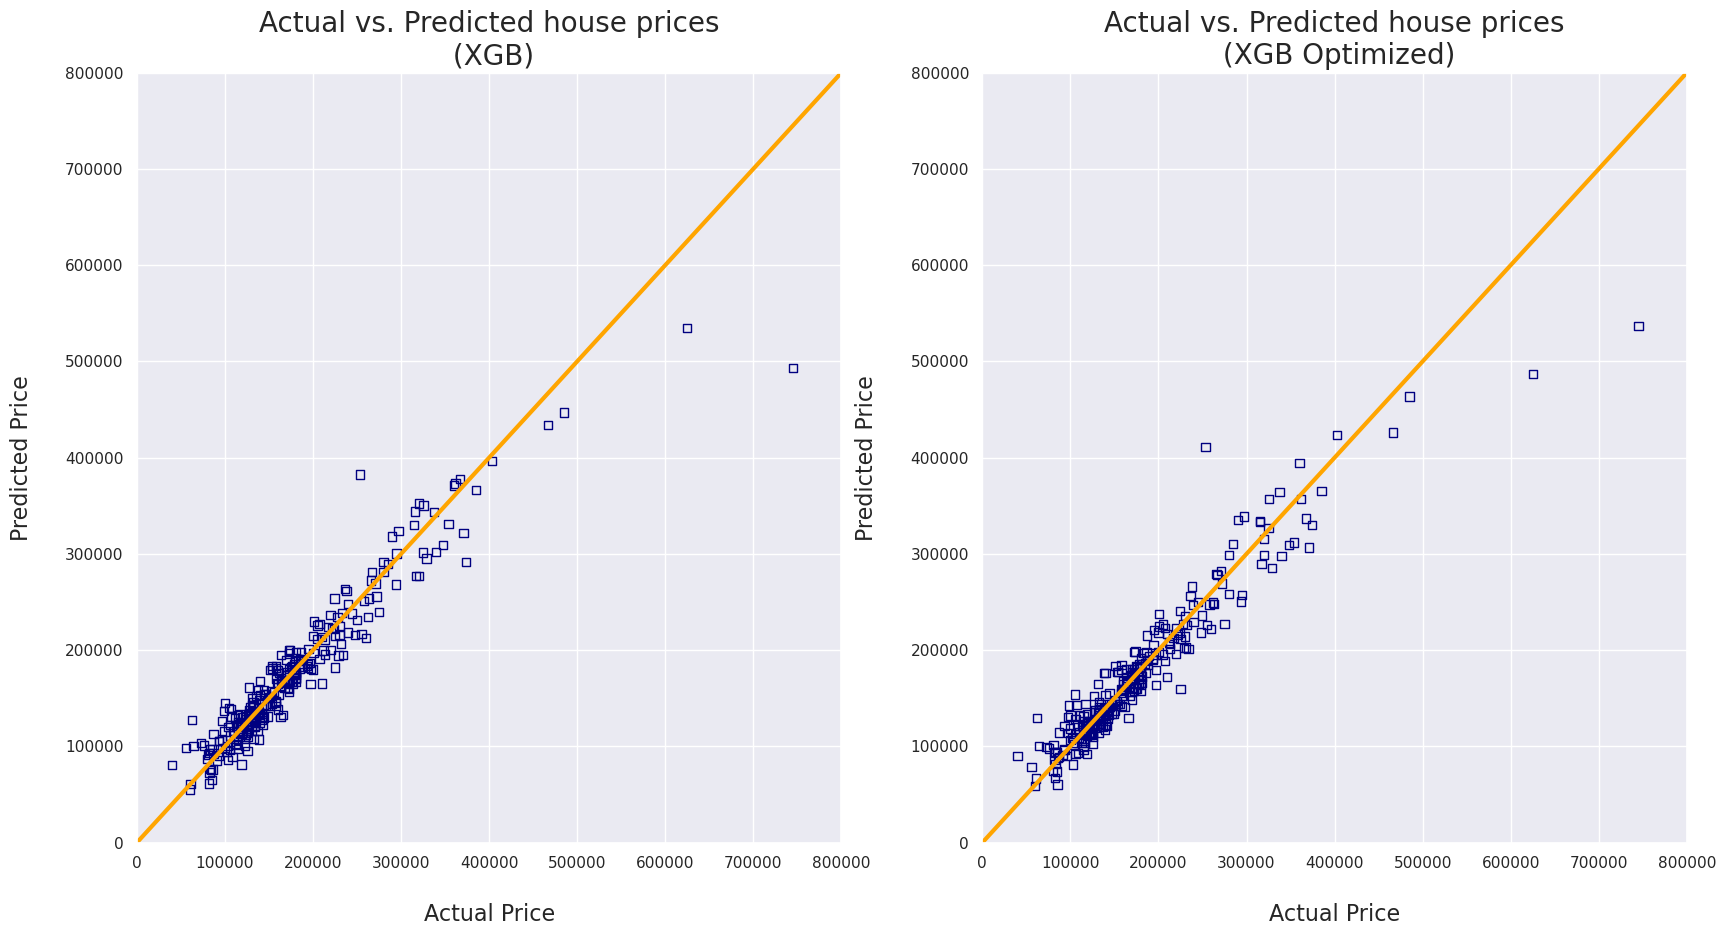

In [95]:
plt.figure(figsize=(20, 10))
# Before Optimization
plt.subplot(1,2,1)

plt.scatter(np.exp(y_test), np.exp(y_preds_xgb),
            color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (XGB)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)

# After Optimization
plt.subplot(1,2,2)

plt.scatter(np.exp(y_test), np.exp(y_preds_xgb_tune),
            color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (XGB Optimized)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)

plt.show()

In [96]:
# Adding the results of the XGB model
algorithms.append(xgb_model_tune.__class__.__name__)
R_squared.append(round(r2_score(y_test, y_preds_xgb_tune),4))
RMSE.append(round(np.sqrt(mean_squared_error(y_test, y_preds_xgb_tune)),4))

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Final Results

In [97]:
# Demonstrating final results for each model
final_results = pd.DataFrame({'Algorithm': algorithms,\
                            'R_squared': R_squared,\
                            'RMSE': RMSE})
final_results

,Algorithm,R_squared,RMSE
0,LinearRegression,0.9144,0.1219
1,Lasso,0.9142,0.1220
2,Ridge,0.9144,0.1219
3,RandomForestRegressor,0.8786,0.1452
4,XGBRegressor,0.8939,0.1357


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Prediction

In [100]:
# Predicting house prices for the test data
y_pred_test = np.exp(ridge_model_tune.predict(df_test_transform))

# Get the ID column from the original test dataset
id_column = df_test['Id']

# Create the output dataframe with the predicted sale prices and the ID column
output = pd.DataFrame({'Id': id_column, 'SalePrice': np.round(y_pred_test.reshape(1459,).tolist())})

# Output the dataframe
output.head()


,Id,SalePrice
0,1461,116769.0
1,1462,148388.0
2,1463,184157.0
3,1464,192197.0
4,1465,211113.0


In [101]:
output.to_csv('submission.csv', index=False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Actionable Insights

The three actionable Insights that can be derived from the above analysis:

1.Focus on the overall quality and living area square footage: 
The two features that are strongly correlated with the sales price are the Overall Quality and GrLivArea. This suggests that to achieve a high sales price, a property owner should invest in high-quality materials and finishes for the house and increase the above-ground living area square footage. It is also supported by a paper by Shishir Mathur. “For example, a medium-quality house sells for approximately 25% more than a low-quality house, and a well-maintained house sells for approximately 5% more than a house that is not well-maintained.(Shishir, 2019)”

2.Consider properties with recent construction or remodeling dates: 
YearBuilt and YearRemodAdd are moderately correlated with the sales price, which indicates that recent construction or remodeling can positively impact the value of the property. Therefore, investing in newer properties or remodeling existing ones can result in a higher sales price. In addition to tangible assets such as the size of the house and the number of the bedrooms and bathrooms, the year built is also listed as a factor in the price of the house (Kang et al., 2021)

3.Pay attention to the basics:
While the weakly correlated features may not have a significant impact on the sales price, they are still worth considering. MSSubClass, LotFrontage, LotArea, and OverallCond are all features that a property owner should pay attention to because they can still influence the value of the property. A well-maintained property with a good overall condition rating, for instance, can potentially fetch a higher price in the market. Investopedia also points out in the article that the maintenance can have a positive effect on landlords."Remodeling can boost the return on investment (ROI) of a house. Wood decks, window replacement, and kitchen and bathroom upgrades tend to generate the highest ROIs.(Baldridge, 2022)"

## Conclusion

In conclusion; the predicted sale prices could be used to identify undervalued or overvalued properties, or to forecast potential returns on investment. The analysis can also be used to inform pricing strategies, the predicted sale prices could be used to set listing prices that maximize profits while remaining competitive with other properties in the market.

## Bibliography
<br>
Baldridge, R. (2022, March 12). Will Your Home Renovations Pay Off? Investpedia. https://www.investopedia.com/articles/mortgages-real-estate/08/add-value-to-real-estate.asp<br>
<br>
Kang, Y., Zhang , F., Peng, wenzhe , Gao , S., Rao, J., Duarte, fabio  , & Ratti, C. (2021). Understanding House Price Appreciation Using Multi-Source Big Geo-Data and Machine Learning. Land Use Policy, 111. https://doi.org/https://doi.org/10.1016/j.landusepol.2020.104919<br>
<br>
Shishir Mathur (2019) House price impacts of construction quality and level of maintenance on a regional housing market: Evidence from King County, Washington, Housing and Society, 46:2, 57-80, DOI: 10.1080/08882746.2019.1601928.<br>
<br>